## 1. Data Preparation

In [1]:
# sentiment
categories = ['nostalgia', 'not nostalgia']

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [3]:
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [4]:
# my functions
import helpers_homework.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame(dmh.format_rows(df), columns=['sentiment_name', 'comment'])

# 檢查格式化後的數據
print(X)

     sentiment_name                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [5]:
X['sentiment'] = X['sentiment_name'].apply(lambda t: dmh.format_labels_number(t, X))
X = X[['sentiment','comment', 'sentiment_name']]

In [6]:
X[0:10]

sentiment                                            comment sentiment_name
0          1  He was a singer with a golden voice that I lov...  not nostalgia
1          0  The mist beautiful voice ever I listened to hi...      nostalgia
2          0  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3          1  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4          0  listening to his songs reminds me of my mum wh...      nostalgia
5          0  Every time I heard this song as a child, I use...      nostalgia
6          0  My dad loved listening to Jim Reeves, when I w...      nostalgia
7          0  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia
8          1           Wherever you  are you always in my heart  not nostalgia
9          1  Elvis will always be number one no one can com...  not nostalgia

## 2. Data Mining 

### 2.1 Missing Values

In [7]:
X.isnull()

sentiment  comment  sentiment_name
0         False    False           False
1         False    False           False
2         False    False           False
3         False    False           False
4         False    False           False
...         ...      ...             ...
1495      False    False           False
1496      False    False           False
1497      False    False           False
1498      False    False           False
1499      False    False           False

[1500 rows x 3 columns]

In [8]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       sentiment_name  
0  The amoung of missing records is:   
1                                   0

### 2.2 Dealing with Duplicate Data

In [9]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [10]:
sum(X.duplicated())

1

In [11]:
X[X.duplicated(keep=False)]

sentiment                                            comment  \
62          1  never heard this song before... WOW What an am...   
78          1  never heard this song before... WOW What an am...   

   sentiment_name  
62  not nostalgia  
78  not nostalgia

In [12]:
X.drop_duplicates(keep='first', inplace=True) #刪除重複的行，保留第一次出現的
X.reset_index(drop=True, inplace=True) # 從新排列索引

In [13]:
X.iloc[78]

sentiment                                                         0
comment           How good it was back then we had it all !The M...
sentiment_name                                            nostalgia
Name: 78, dtype: object

In [14]:
len(X)

1499

## 3. Data Processing

### 3.1 Sampling

In [15]:
X_sample = X.sample(n = 750) # random state

In [16]:
len(X_sample)

750

In [17]:
X_sample[0:4]

sentiment                                            comment  \
1440          0  My dad would listen to this song and I was the...   
588           0  my sister played this to me when i was a child...   
1300          0  This song was on the first mix tape I made for...   
1406          0  this song was the  back in the day man when it...   

     sentiment_name  
1440      nostalgia  
588       nostalgia  
1300      nostalgia  
1406      nostalgia

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
categories

['nostalgia', 'not nostalgia']

sentiment_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


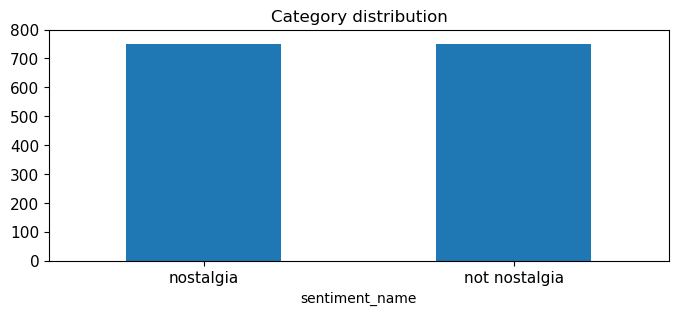

In [20]:
print(X.sentiment_name.value_counts())

# plot barchart for X
upper_bound = max(X.sentiment_name.value_counts()) + 50
X.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# rot是下面標籤轉的幅度
plt.show()

sentiment_name
nostalgia        375
not nostalgia    375
Name: count, dtype: int64


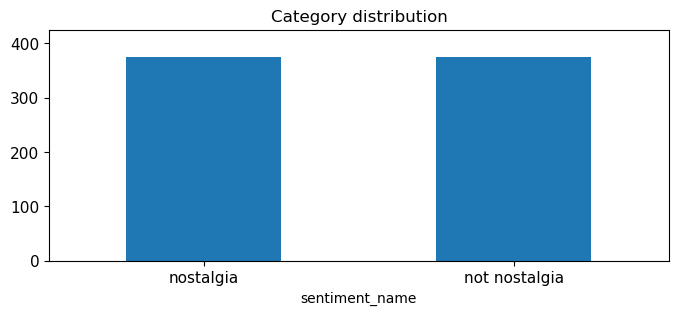

In [21]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
upper_bound = max(X_sample.sentiment_name.value_counts()) + 50
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# rot是下面標籤轉的幅度
plt.show()

Comment: 可以看見兩個類別的分布是 1:1 ，在整體的會分懷舊少一筆主要原因是因為有重複的資料進行了移除

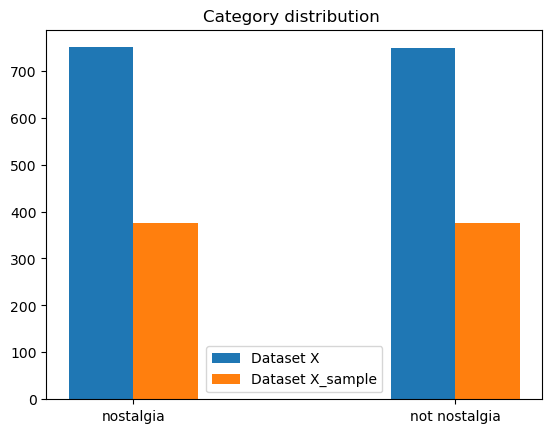

In [22]:
# 計算兩個 dataset 的類別統計
X_counts = X.sentiment_name.value_counts()
X_sample_counts = X_sample.sentiment_name.value_counts()

# 找到所有的類別，並確保兩組資料對齊
all_categories = X_counts.index

# 設定 bar 寬度和位置
bar_width = 0.2
index = range(len(all_categories))

# 繪製第一組資料的柱狀圖
plt.bar(index, X_counts, bar_width, label='Dataset X')

# 繪製第二組資料的柱狀圖，並將其向右偏移
plt.bar([i + bar_width for i in index], X_sample_counts, bar_width, label='Dataset X_sample')

# 設定標題和標籤
plt.title('Category distribution ')
plt.xticks([i + bar_width / 2 for i in index],all_categories, rotation=0)

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()

### 3.2 Feature Creation

In [23]:
import nltk

In [24]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [25]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [26]:
X[0:4]

sentiment                                            comment  \
0          1  He was a singer with a golden voice that I lov...   
1          0  The mist beautiful voice ever I listened to hi...   
2          0  I have most of Mr. Reeves songs.  Always love ...   
3          1  30 day leave from 1st tour in Viet Nam to conv...   

  sentiment_name                                           unigrams  
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...  
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...  
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [27]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 3.3 Feature subset selection

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [29]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [30]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [31]:
X_counts.shape

(1499, 3730)

In [32]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [33]:
X_counts[0:5, 0:100].toarray() #提取出前五篇文檔（行）和在前 100 個特徵（列）的狀況

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [35]:
# Answer here
import numpy as np

X_counts[0:1, 0:100].toarray()

#使用numpy找出非0的那一列
indices = np.nonzero(X_counts[0:1, 0:100].toarray())[1]

# 提取詞彙表中的對應詞
count_vect.get_feature_names_out()[indices]

array(['16years'], dtype=object)

In [36]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [37]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [38]:
plot_z = X_counts[0:20, 0:20].toarray() # X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

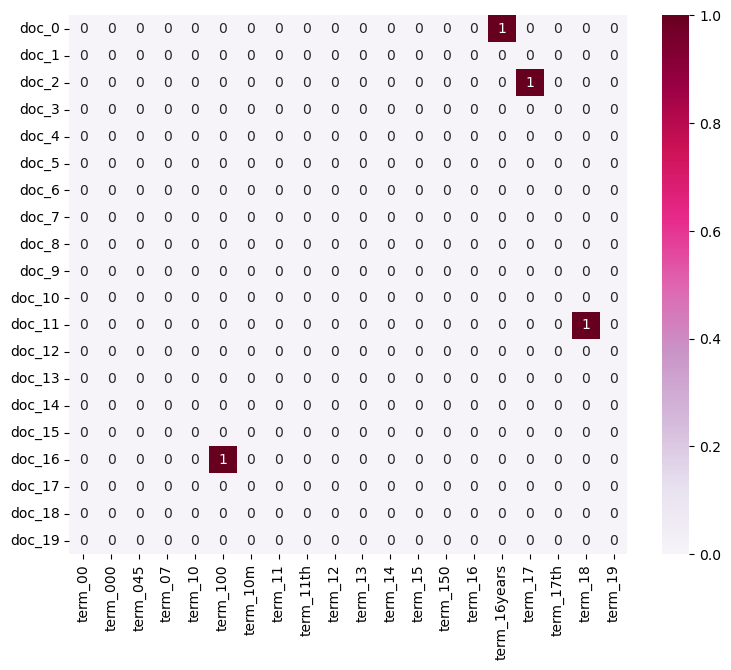

In [39]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", #熱圖的顏色映射為粉紅色調
                 vmin=0, vmax=1, annot=True) #annot 熱圖的每個格子中顯示數據值
plt.show()

In [40]:
# 計算每一特徵在所有文檔中出現的次數
feature_counts = X_counts.sum(axis=0).A1

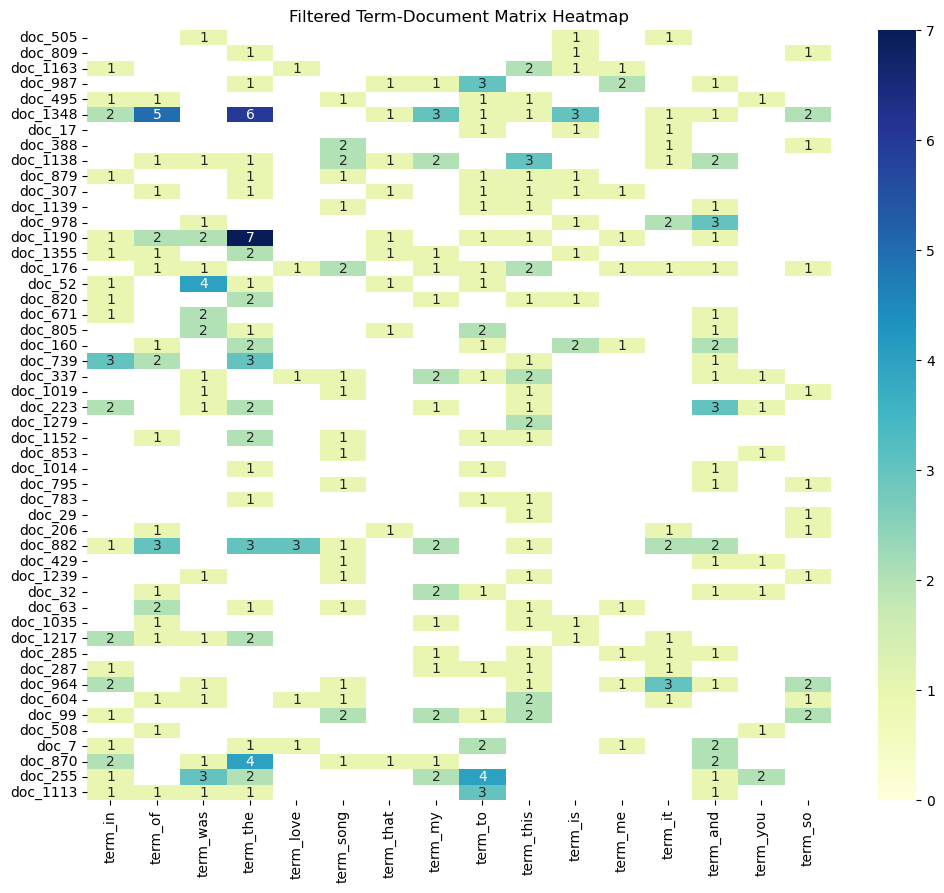

In [41]:
#  Answer here
# 1.藉由從所有資料集中選定較常出現的特徵以及得到比較有用的視覺化圖形
# 2.並且擴大資料選擇的範圍

# 訂定希望出現幾次以上的特徵
threshold = 300

selected_features = np.where(feature_counts >= threshold)[0]

num_docs = X_counts.shape[0] 
num_features = selected_features.size

random_doc_indices = np.random.choice(num_docs, size=50,replace=False)

if num_features > 0:  # 確保有 > threshold 的特徵
    random_feature_indices = np.random.choice(selected_features, size=min(60,num_features), replace=False)

    # 建構數據
    plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[random_feature_indices]]
    plot_y = ["doc_" + str(i) for i in random_doc_indices]
    plot_z = X_counts[random_doc_indices][:, random_feature_indices].toarray()

    df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

    # 繪製熱圖
    mask = (plot_z == 0)

    plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_todraw, mask=mask, cmap="YlGnBu", vmin=0, annot=True)
    plt.title("Filtered Term-Document Matrix Heatmap")
    plt.show()

### 3.4 Attribute Transformation / Aggregation

In [53]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] # 列的方向進行計算
feature_terms = count_vect.get_feature_names_out()
# 計算每一特徵在所有文檔中出現的次數
# 與上方功能相同
# feature_counts = X_counts.sum(axis=0).A1

In [54]:
term_frequencies

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
term_frequencies[0] # sum of first term: 00

1

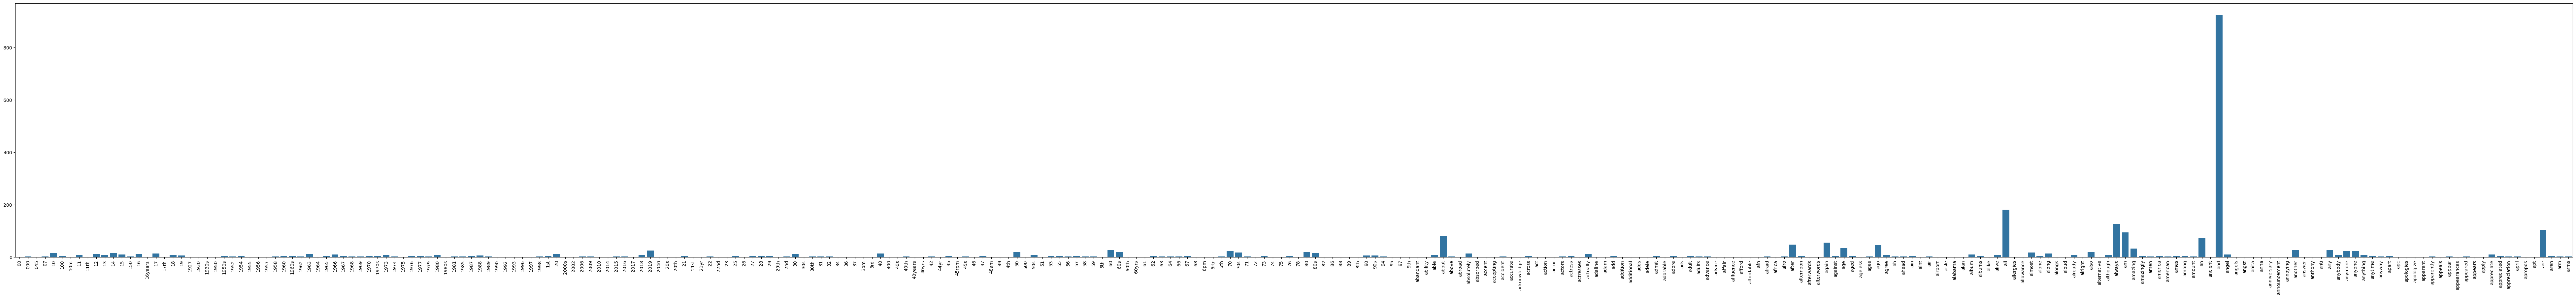

In [55]:
plt.close() # 關掉先前的
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=feature_terms[:300], 
            y=term_frequencies[:300])
g.set_xticks(range(300))  # 設置 x 軸的刻度位置
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

In [56]:
# 找到最大頻率的索引
max_index = np.argmax(term_frequencies)
# 獲取對應的詞彙
max_frequency_word = feature_terms[max_index]
# 找到最大頻率值
max_frequency_value = term_frequencies[max_index]
print(f"最大頻率的詞: '{max_frequency_word}'，出現次數: {max_frequency_value}")

最大頻率的詞: 'the'，出現次數: 1351


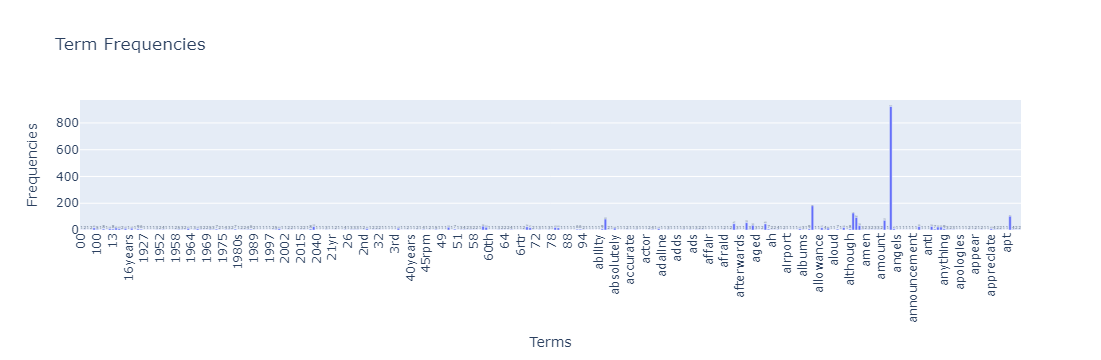

In [58]:
# 提供更好觀察的圖表
import plotly.express as px
import pandas as pd

# 準備數據
data = pd.DataFrame({'Terms': feature_terms[:300], 'Frequencies': term_frequencies[:300]})  # 創建 DataFrame

# 創建互動式條形圖
fig = px.bar(data, x='Terms', y='Frequencies', title='Term Frequencies', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

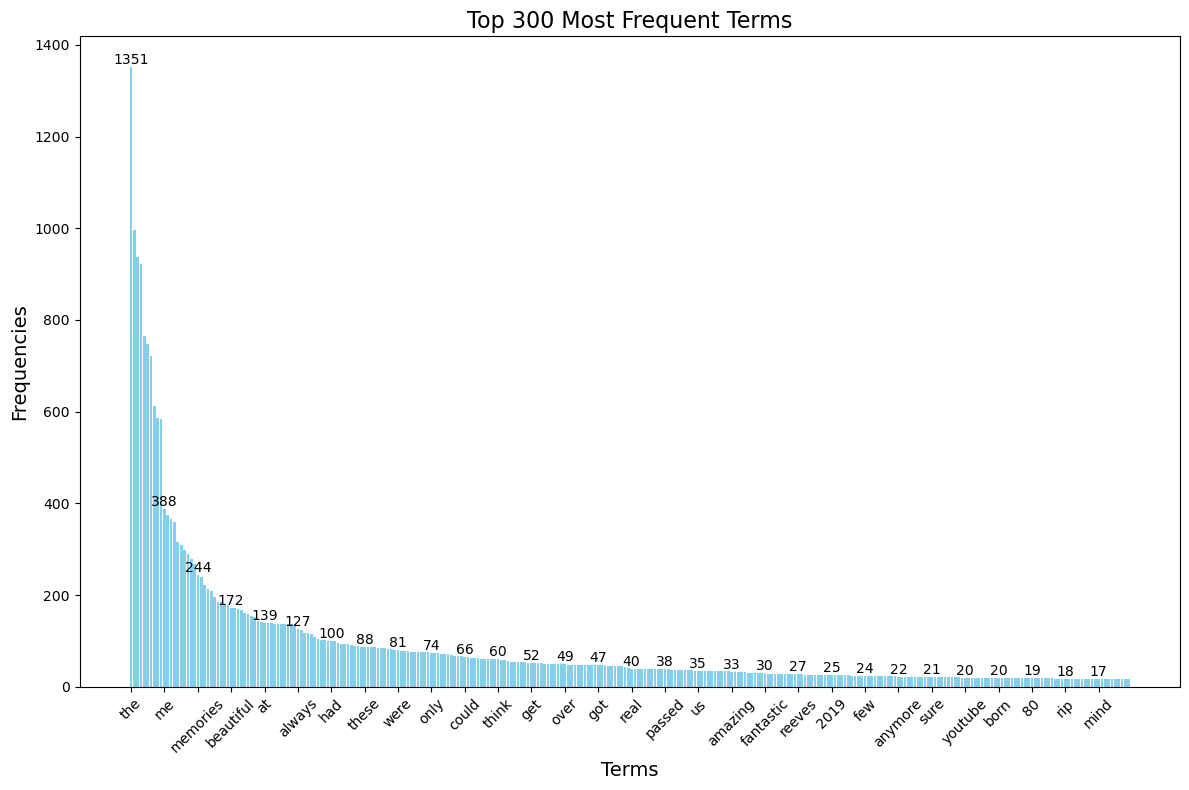

In [59]:
plt.close() # 關掉先前的
import pandas as pd
import matplotlib.pyplot as plt

# 準備數據
data = pd.DataFrame({'Terms': feature_terms, 'Frequencies': term_frequencies})  # 創建 DataFrame

# 選擇出現次數前300高的
top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False)

# 創建條形圖
plt.figure(figsize=(12, 8))  # 設置圖形大小
plt.bar(top_data['Terms'], top_data['Frequencies'], color='skyblue')  # 繪製條形圖

# 添加標題和標籤
plt.title('Top 300 Most Frequent Terms', fontsize=16)
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)

# 旋轉 x 軸標籤以便於顯示
plt.xticks(rotation=90)

# 顯示頻率標籤，每 20 個顯示一次
interval = 10  # 設定顯示間隔
for index, value in enumerate(top_data['Frequencies']):
    if index % interval == 0:  # 每隔 interval 顯示一次
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# 每隔一定數量顯示一個標籤
plt.xticks(ticks=range(0, len(top_data['Terms']), 10), labels=top_data['Terms'][::10], rotation=45)

# 顯示圖形
plt.tight_layout()  # 自動調整佈局以避免重疊
plt.show()


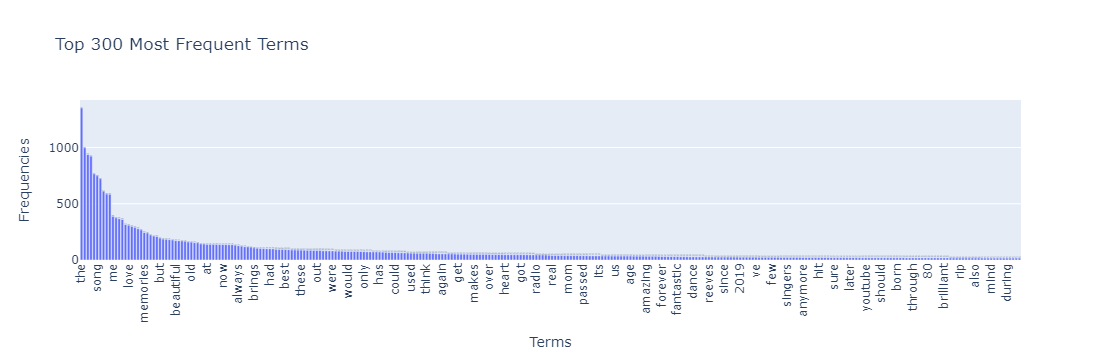

In [49]:
#動態的更加清楚好懂

# 準備數據
terms = count_vect.get_feature_names_out() # 獲得所有特徵
frequencies = term_frequencies  # 獲得所有特徵的頻率
data = pd.DataFrame({'Terms': terms, 'Frequencies': frequencies})  # 創建 DataFrame

top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False) # 選擇出現次數前50高的

# 創建互動式條形圖
fig = px.bar(top_data, x='Terms', y='Frequencies', title='Top 300 Most Frequent Terms', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

In [50]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

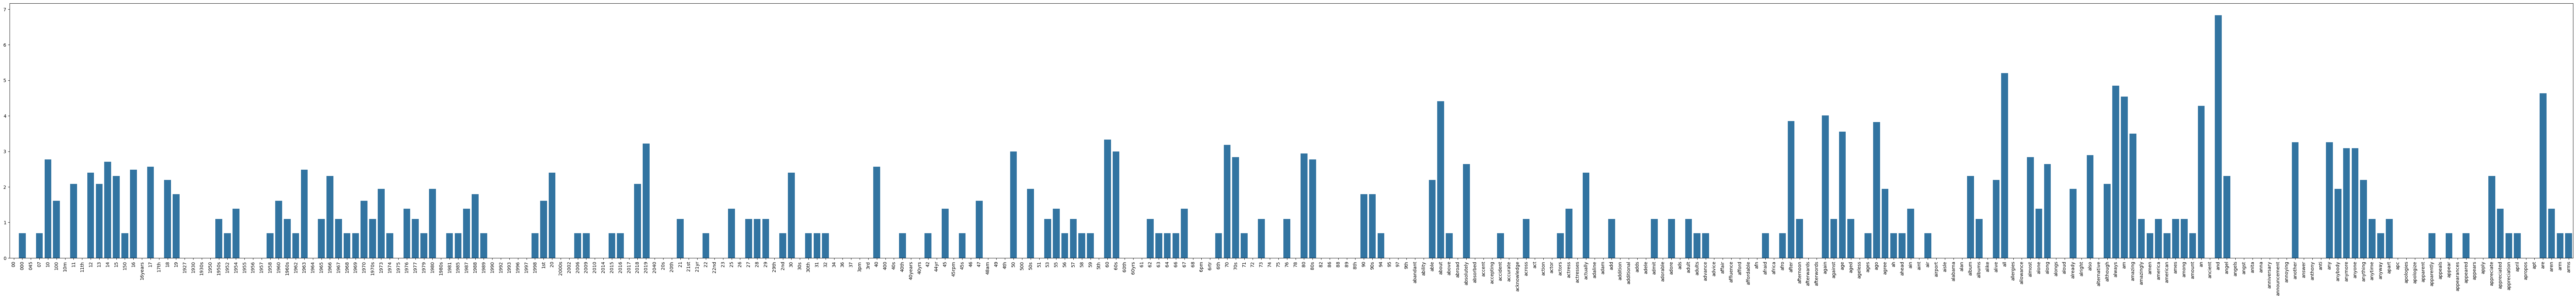

In [60]:
plt.close()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=feature_terms[:300],
                y=term_frequencies_log[:300])
g.set_xticks(range(300))  # 設置 x 軸的刻度位置
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

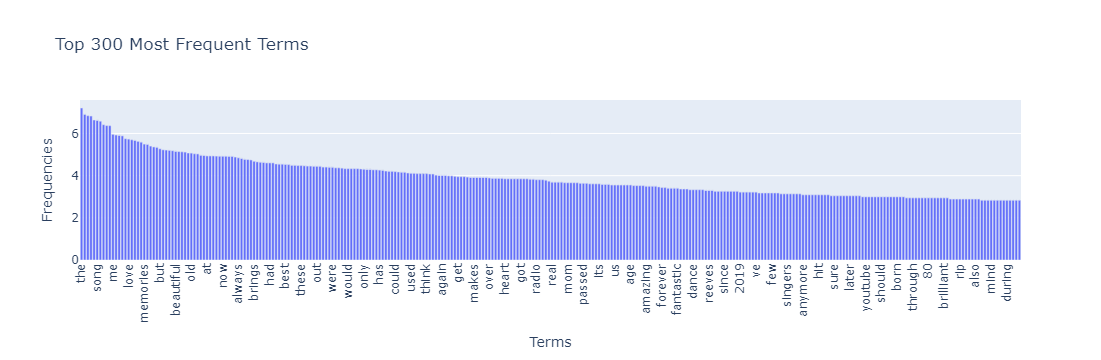

In [62]:
# 準備數據
data = pd.DataFrame({'Terms': feature_terms, 'Frequencies': term_frequencies_log})  # 創建 DataFrame

top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False) # 選擇出現次數前50高的

# 創建互動式條形圖
fig = px.bar(top_data, x='Terms', y='Frequencies', title='Top 300 Most Frequent Terms', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

# 可以發現log將頻率進行壓縮，並且使數據的坡度更加平滑，不像之前的差異極度巨大

Finding frequent patterns

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [74]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number= 0 
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

In [72]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number= 1 
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

[ 2 13  5 ...  6  3  1]


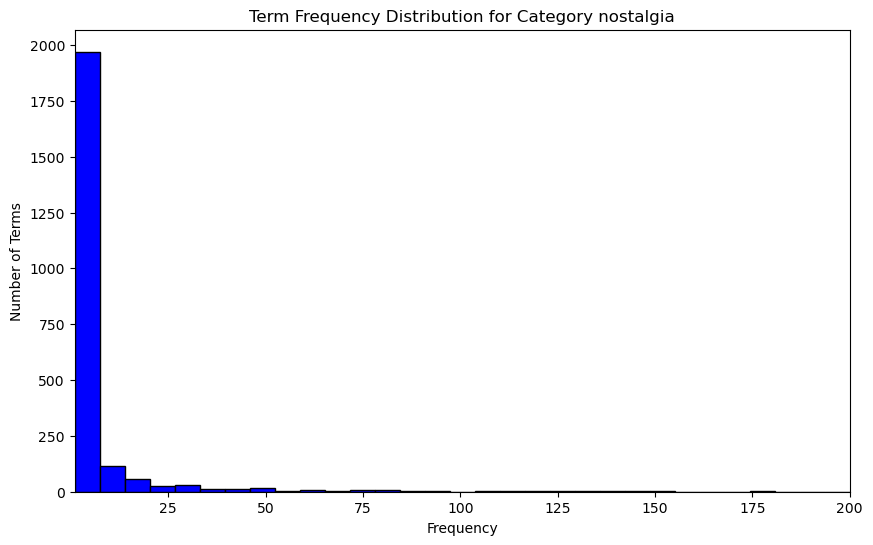

In [78]:
# Sum over all documents to get total frequency for each word
category_number = 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
print(word_counts)

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=100,color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#代表只出現一次在一個文檔的詞非常的多

In [94]:
#觀察頻率過高的詞

category_number= 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # 會將按照大到小的排序的資料的原始索引顯示
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts) # 在這個類別剩下多少item
top_5_percent_index = int(0.05 * total_terms) # 前%是多少

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [95]:
sorted_counts[:top_5_percent_index]

array([643, 566, 545, 543, 472, 440, 432, 361, 349, 318, 300, 272, 240,
       226, 179, 154, 150, 148, 144, 140, 134, 129, 127, 119, 116, 110,
       107, 106, 104,  92,  90,  89,  83,  82,  82,  80,  79,  79,  79,
        78,  77,  74,  74,  74,  72,  70,  70,  68,  67,  66,  65,  64,
        63,  63,  61,  61,  60,  54,  54,  54,  53,  52,  51,  50,  50,
        50,  50,  49,  48,  48,  48,  47,  47,  47,  47,  47,  46,  45,
        45,  44,  43,  43,  43,  43,  43,  42,  42,  42,  39,  39,  38,
        38,  38,  37,  37,  36,  35,  34,  33,  33,  33,  33,  33,  32,
        32,  32,  31,  31,  31,  31,  31,  31,  30,  30], dtype=int64)

In [96]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0)

643

In [97]:
#觀察過低的詞
category_number =  0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [98]:
sorted_counts[:bottom_1_percent_index]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [99]:
filt_term_document_dfs[categories[category_number]].loc[:,'milestone'].sum(axis=0)

1

In [102]:
#刪除頻率過高的詞
category_number= 0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words) #過濾掉頻率高的數值
    bottom_n = int(bottom_percent * total_words) #過濾掉頻率低的數值
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
# filt_term_document_dfs 這個變數是原始檔案的頻率
term_document_dfs = {} # 這個是經過刪除最前面與最後面的檔案

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])
    print(f"Filtered Term-Document Frequency DataFrame for Category {category}:")
    print(term_document_dfs[category]) # 2602 -> 2446;2295 ->2159


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64
Filtered Term-Document Frequency DataFrame for Category not nostalgia:
     000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...      

可以看到類別0特徵數: 2602 -> 2446;
可以看到類別1特徵數: 2295 ->2159

In [126]:
#某一行的文檔（row）中的所有詞的頻率都小於 thresholdValue，該行將不會出現在輸出的檔案中。
def custom_convert2TransactionalDatabase(df, outputFile, thresholdValue=1):
    # Open the file with utf-8 encoding to handle special characters
    with open(outputFile, 'w', encoding='utf-8') as f:
        # Iterate through each row (document) in the DataFrame
        for index, row in df.iterrows():
            # Get the terms that meet the threshold value
            transaction = row[row >= thresholdValue].index.tolist()
            
            # Write the transaction to the file
            if len(transaction) > 1:
                f.write(f'{transaction[0]}')
                for item in transaction[1:]:
                    f.write(f'\t{item}')
                f.write('\n')
            elif len(transaction) == 1:
                f.write(f'{transaction[0]}\n')

# 使用這個自定義函數來替代原本的 convert2TransactionalDatabase 函數
for category in term_document_dfs:
    category_safe = category.replace(' ', '_')
    
    # 這裡呼叫自定義函數，避免編碼問題
    custom_convert2TransactionalDatabase(term_document_dfs[category], f'./td_freq_db/td_freq_db_{category_safe}.csv')
    print(f'./td_freq_db/td_freq_db_{category_safe}.csv is done') 

./td_freq_db/td_freq_db_not_nostalgia.csv is done
./td_freq_db/td_freq_db_nostalgia.csv is done


Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


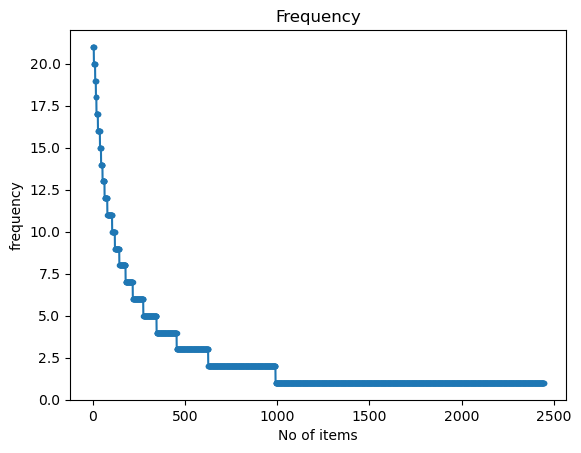

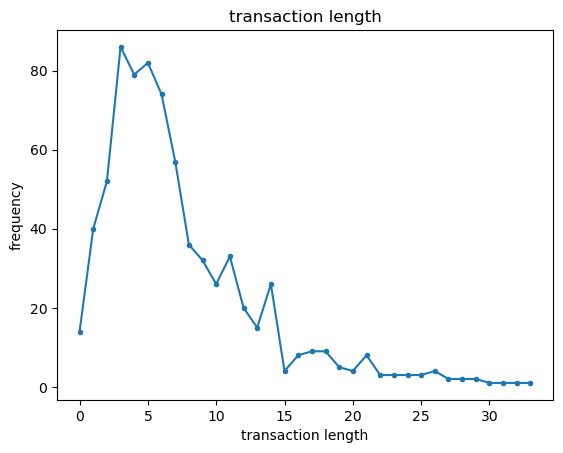

In [127]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
plt.close()
obj = tds.TransactionalDatabase('./td_freq_db/td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()
plt.show()

# Database size (total no of transactions) : 745
# 這是資料庫中的總交易數量，即有745筆交易（或文件）

# Number of items : 2446
# 資料庫中包含的獨特項目總數，共有2446個不同的特徵

# Minimum Transaction Size : 1
# 最小交易大小，即最小的交易中僅包含1個特徵

# Average Transaction Size : 8.41
# 平均每筆交易中包含的項目數，平均而言，每筆交易有約8.41個特徵

# Maximum Transaction Size : 46
# 最大的交易大小，即在某一筆交易中包含了最多46個項目。

# Standard Deviation Transaction Size : 5.93
# 交易大小的標準差，表示交易大小的分散程度。數值為5.93，表示有些交易的大小偏離平均值較多。

# Variance in Transaction Sizes : 35.17
# 交易大小的變異數，是交易大小的離散程度的另一種測量方式。變異數越大，說明交易大小的變化越大。

# Sparsity : 0.9965614316210002
# 稀疏度，指資料庫的稀疏性，數值接近1表示資料非常稀疏。這意味著大多數交易只包含少量項目，相對於整個資料庫中的所有可能項目來說，這些交易中的項目數量很少。

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


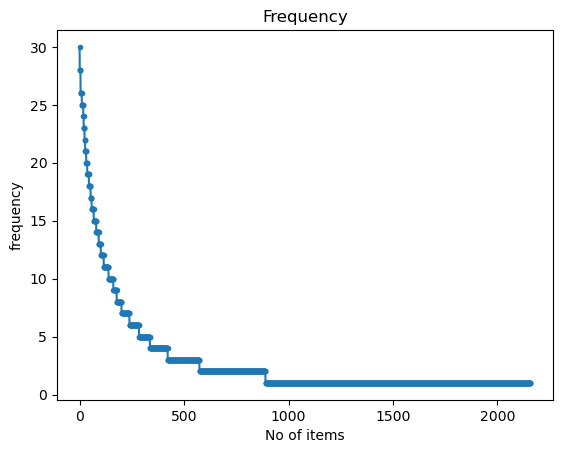

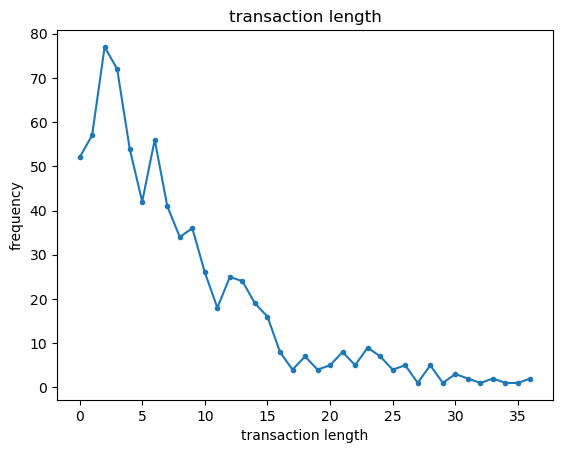

In [128]:
plt.close()
obj = tds.TransactionalDatabase('./td_freq_db/td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()
plt.show()

In [237]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3 # 選擇 minsup 為 3
obj1 = alg.FPGrowth(iFile='./td_freq_db/td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.020412921905517578


In [238]:
obj1.save(f'./freq_patterns_minsup/freq_patterns_not_nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0       emotional        3
1             fan        3
2              30        3
3        blessing        3
4        december        3
..            ...      ...
725       classic       21
726          them       21
727    them every        4
728        lyrics       21
729  lyrics every        3

[730 rows x 2 columns]

In [239]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='./td_freq_db/td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 948
Runtime: 0.022714614868164062


In [240]:
obj2.save(f'./freq_patterns_minsup/freq_patterns_nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0           forgot        3
1               mr        3
2       appreciate        3
3            death        3
4        death jim        3
..             ...      ...
943          would       28
944           will       28
945  will favorite        3
946             go       28
947       favorite       30

[948 rows x 2 columns]

In [256]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# # # Convert the pattern_counts dictionary to a DataFrame
# pattern_counts_df = pd.DataFrame(pattern_counts.items(), columns=['Pattern', 'Count'])

# # # Display the first few rows
# print(pattern_counts_df)


# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
print(total_patterns_count)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns) # 刪掉只出現過一次的

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df) # 保留的是只出現在其中一個類別的特徵
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

1678
           Patterns  Support
1052           will       28
1051          would       28
1050           ever       28
1038           only       26
1047           wish       26
...             ...      ...
466              57        3
467        whatever        3
468          august        3
469          roller        3
1053  will favorite        3

[1054 rows x 2 columns]
Number of patterns discarded: 624


In [257]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index) # 這個是原來就有的特徵

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1) # 結合上方找出的特徵

augmented_df # 這個是包含FPGrowth與原先的特徵的增強資料集

00  000  045  07  10  100  10m  11  11th  12  ...  store  watched  fun  \
0      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
2      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
3      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
4      0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...      ...  ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   

      1950s  bar  57  whatever  august  roller  will favorite  
0         0    0   0         0       0       0              0  
1         0    0   0         0       0       0              0  
2         0    0   0         0       0       0              0  
3         0    0   0         0       0       0              0  
4         0    0   0         0       0       0              0  
...     ...  ...  ..       ...     ...     ...            ...  
1494      0    0   0         0       0       0              0  
1495      0    0   0         0       0       0              0  
1496      0    0   0         0       0       0              0  
1497      0    0   0         0       0       0              0  
1498      0    0   0         0       0       0              0  

[1499 rows x 4784 columns]

In [258]:
from PAMI.frequentPattern.topk import FAE  # 導入 FAE Top-K
# for not nostalgia
# 針對不同的 K 值進行測試
k_values = [800]

In [247]:
# for not nostalgia
# 儲存每個支持度值的結果
results_top_K_not_nostalgia = {}

for k in k_values:

    obj_topK = FAE.FAE(iFile='./td_freq_db/td_freq_db_not_nostalgia.csv', k=k, sep='\t') 
    obj_topK.mine()
    TopKfrequentPatternsDF_not_nostalgia = obj_topK.getPatternsAsDataFrame() 

    print(f'Total No of patterns for k={k}: {len(TopKfrequentPatternsDF_not_nostalgia)}')  # 打印頻繁模式的總數
    print(f'Runtime for k={k}: {obj_topK.getRuntime()} seconds')  # 測量運行時間

    obj_topK.save(f'./top_K_patterns/top_{k}_patterns_not_nostalgia.txt')  # 保存頻繁模式
    results_top_K_not_nostalgia[k] = TopKfrequentPatternsDF_not_nostalgia

print(results_top_K_not_nostalgia)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k=800: 800
Runtime for k=800: 1.057861328125 seconds
{800:        Patterns  Support
0         elvis       21
1         every       21
2         loved       21
3       classic       21
4          them       21
..          ...      ...
795  difference        2
796        nine        2
797        slap        2
798     naughty        2
799       needs        2

[800 rows x 2 columns]}


In [248]:
# for nostalgia
# 儲存每個支持度值的結果
results_top_K_nostalgia = {}

for k in k_values:

    obj_topK = FAE.FAE(iFile='./td_freq_db/td_freq_db_nostalgia.csv', k=k, sep='\t') 
    obj_topK.mine()
    TopKfrequentPatternsDF_nostalgia = obj_topK.getPatternsAsDataFrame() 

    print(f'Total No of patterns for k={k}: {len(TopKfrequentPatternsDF_nostalgia)}')  # 打印頻繁模式的總數
    print(f'Runtime for k={k}: {obj_topK.getRuntime()} seconds')  # 測量運行時間

    obj_topK.save(f'./top_K_patterns/top_{k}_patterns_nostalgia.txt')  # 保存頻繁模式
    results_top_K_nostalgia[k] = TopKfrequentPatternsDF_nostalgia
print(results_top_K_nostalgia)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k=800: 800
Runtime for k=800: 0.3410196304321289 seconds
{800:          Patterns  Support
0        favorite       30
1            ever       28
2           would       28
3            will       28
4              go       28
..            ...      ...
795      over get        3
796  over country        3
797    over which        3
798      over pop        3
799  over perfect        3

[800 rows x 2 columns]}


In [249]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as algm
# for not nostalgia
# 定義最小支持度列表
minSup_values = [2,3]

# 儲存每個支持度值的結果
results_not_nostalgia = {}

for minSup in minSup_values:

    obj_max = algm.MaxFPGrowth(iFile='./td_freq_db/td_freq_db_not_nostalgia.csv', minSup=minSup)
    obj_max.mine()
    MaxfrequentPatternsDF_not_nostalgia = obj_max.getPatternsAsDataFrame()

    print(f'Total No of patterns for minSup={minSup}: {len(MaxfrequentPatternsDF_not_nostalgia)}') 
    print(f'Runtime for minSup={minSup}: {obj_max.getRuntime()} seconds') 

    obj_max.save(f'./freq_patterns_max/freq_patterns_not_nostalgia_minSup{minSup}_max.txt') 
    results_not_nostalgia[minSup] = MaxfrequentPatternsDF_not_nostalgia

# =====================================================================
# for nostalgia
# 儲存每個支持度值的結果
results_nostalgia = {}

for minSup in minSup_values:

    obj_max = algm.MaxFPGrowth(iFile='./td_freq_db/td_freq_db_nostalgia.csv', minSup=minSup)
    obj_max.mine()
    MaxfrequentPatternsDF_nostalgia = obj_max.getPatternsAsDataFrame()

    print(f'Total No of patterns for minSup={minSup}: {len(MaxfrequentPatternsDF_nostalgia)}') 
    print(f'Runtime for minSup={minSup}: {obj_max.getRuntime()} seconds') 

    obj_max.save(f'./freq_patterns_max/freq_patterns_nostalgia_minSup{minSup}_max.txt') 
    results_nostalgia[minSup] = MaxfrequentPatternsDF_nostalgia

print(results_not_nostalgia)
print(results_nostalgia)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=2: 1226
Runtime for minSup=2: 0.055409908294677734 seconds
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=3: 592
Runtime for minSup=3: 0.0242769718170166 seconds
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=2: 1836
Runtime for minSup=2: 0.04969286918640137 seconds
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=3: 682
Runtime for minSup=3: 0.02265334129333496 seconds
{2:              Patterns  Support
0             giving         2
1          after dog         2
2     them age dudes         2
3     tomorrow twice         2
4             bottom         2
...               ...      ...
1221        well age         2
1222     classic age         2
1223    every thanks   

In [261]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [results_top_K_not_nostalgia[800], results_top_K_nostalgia[800]]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts_top_800 = {}
for df in dfs:
    print(df)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts_top_800:
            pattern_counts_top_800[pattern] = 1
        else:
            pattern_counts_top_800[pattern] += 1

# # # Convert the pattern_counts dictionary to a DataFrame
# pattern_counts_df_top_800 = pd.DataFrame(pattern_counts_top_800.items(), columns=['Pattern', 'Count'])

# # # Display the first few rows
# print(pattern_counts_df_top_800)


# Filter out patterns that appear in more than one dataframe
unique_patterns_top_800 = {pattern for pattern, count in pattern_counts_top_800.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count_top_800 = sum(len(df) for df in dfs)
print(total_patterns_count_top_800)

# Calculate how many patterns were discarded
discarded_patterns_count_top_800 = total_patterns_count_top_800 - len(unique_patterns_top_800) # 刪掉只出現過一次的

# For each category, filter the patterns to keep only the unique ones
filtered_dfs_top_800 = []
for df in dfs:
    filtered_df_top_800 = df[df['Patterns'].isin(unique_patterns_top_800)]
    filtered_dfs_top_800.append(filtered_df_top_800)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_top_800 = pd.concat(filtered_dfs_top_800, ignore_index=True)

# Sort by support
final_pattern_df_top_800 = final_pattern_df_top_800.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_top_800) # 保留的是只出現在其中一個類別的特徵
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count_top_800}")

       Patterns  Support
0         elvis       21
1         every       21
2         loved       21
3       classic       21
4          them       21
..          ...      ...
795  difference        2
796        nine        2
797        slap        2
798     naughty        2
799       needs        2

[800 rows x 2 columns]
         Patterns  Support
0        favorite       30
1            ever       28
2           would       28
3            will       28
4              go       28
..            ...      ...
795      over get        3
796  over country        3
797    over which        3
798      over pop        3
799  over perfect        3

[800 rows x 2 columns]
1600
     Patterns  Support
485      ever       28
487      will       28
486     would       28
488       kid       26
489      only       26
..        ...      ...
456  messages        2
455        hi        2
454  feedback        2
453   between        2
473  eckstine        2

[970 rows x 2 columns]
Number of patterns disc

In [264]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix_top_800 = pd.DataFrame(0, index=X.index, columns=final_pattern_df_top_800['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df_top_800['Patterns']:
    pattern_words_top_800 = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix_top_800[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words_top_800.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index) # 這個是原來就有的特徵

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_top_800 = pd.concat([tdm_df, pattern_matrix_top_800], axis=1) # 結合上方找出的特徵

augmented_df_top_800 # 這個是包含FPGrowth與原先的特徵的增強資料集

00  000  045  07  10  100  10m  11  11th  12  ...  follow  grace  etc  \
0      0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
1      0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
2      0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
3      0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
4      0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...    ...  ...   
1494   0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
1495   0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0      0    0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0      0    0   

      naturally  proper  messages  hi  feedback  between  eckstine  
0             0       0         0   0         0        0         0  
1             0       0         0   0         0        0         0  
2             0       0         0   0         0        0         0  
3             0       0         0   0         0        0         0  
4             0       0         0   0         0        0         0  
...         ...     ...       ...  ..       ...      ...       ...  
1494          0       0         0   0         0        0         0  
1495          0       0         0   0         0        0         0  
1496          0       0         0   0         0        0         0  
1497          0       0         0   0         0        0         0  
1498          0       0         0   0         0        0         0  

[1499 rows x 4700 columns]

In [313]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [results_not_nostalgia[3], results_nostalgia[3]]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts_max3 = {}
for df in dfs:
    print(df)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts_max3:
            pattern_counts_max3[pattern] = 1
        else:
            pattern_counts_max3[pattern] += 1

# # # Convert the pattern_counts dictionary to a DataFrame
# pattern_counts_df_max3 = pd.DataFrame(pattern_counts_max3.items(), columns=['Pattern', 'Count'])

# # # Display the first few rows
# print(pattern_counts_df_max3)


# Filter out patterns that appear in more than one dataframe
unique_patterns_max3 = {pattern for pattern, count in pattern_counts_max3.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count_max3 = sum(len(df) for df in dfs)
print(total_patterns_count_max3)

# Calculate how many patterns were discarded
discarded_patterns_count_max3 = total_patterns_count_max3 - len(unique_patterns_max3) # 刪掉只出現過一次的

# For each category, filter the patterns to keep only the unique ones
filtered_dfs_max3 = []
for df in dfs:
    filtered_df_max3 = df[df['Patterns'].isin(unique_patterns_max3)]
    filtered_dfs_max3.append(filtered_df_max3)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_max3 = pd.concat(filtered_dfs_max3, ignore_index=True)

# Sort by support
final_pattern_df_max3 = final_pattern_df_max3.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_max3) # 保留的是只出現在其中一個類別的特徵
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count_max3}")

          Patterns  Support
0          thinks         3
1          months         3
2       currently         3
3            kids         3
4            wait         3
..             ...      ...
587          days        20
588  every lyrics         3
589    every them         4
590       classic        21
591         loved        21

[592 rows x 2 columns]
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]
1274
           Patterns  Support
444          loved        21
441           days        20
440           well        20
439      wonderful        20
438       favorite        20
..              ...      ...
472         strong         3
473         steady         3
47

In [314]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix_max3 = pd.DataFrame(0, index=X.index, columns=final_pattern_df_max3['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df_max3['Patterns']:
    pattern_words_max3 = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix_max3[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words_max3.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index) # 這個是原來就有的特徵

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_max3 = pd.concat([tdm_df, pattern_matrix_max3], axis=1) # 結合上方找出的特徵

augmented_df_max3 # 這個是包含FPGrowth與原先的特徵的增強資料集

00  000  045  07  10  100  10m  11  11th  12  ...  wise   literally   \
0      0    0    0   0   0    0    0   0     0   0  ...      0           0   
1      0    0    0   0   0    0    0   0     0   0  ...      0           0   
2      0    0    0   0   0    0    0   0     0   0  ...      0           0   
3      0    0    0   0   0    0    0   0     0   0  ...      0           0   
4      0    0    0   0   0    0    0   0     0   0  ...      0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...         ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0           0   

      lives   mine   period   strong   steady   raised   sang lullaby   \
0          0      0        0        0        0        0              0   
1          0      0        0        0        0        0              0   
2          0      0        0        0        0        0              0   
3          0      0        0        0        0        0              0   
4          0      0        0        0        0        0              0   
...      ...    ...      ...      ...      ...      ...            ...   
1494       0      0        0        0        0        0              0   
1495       0      0        0        0        0        0              0   
1496       0      0        0        0        0        0              0   
1497       0      0        0        0        0        0              0   
1498       0      0        0        0        0        0              0   

      favorite will   
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1494               0  
1495               0  
1496               0  
1497               0  
1498               0  

[1499 rows x 4710 columns]

### 3.5 Dimensionality Reduction

In [354]:
from scipy.sparse import csr_matrix

# 將 DataFrame 轉換為稀疏矩陣
augmented_sparse = csr_matrix(augmented_df_max3.values)

# 計算稀疏共現矩陣
co_occurrence_matrix = augmented_sparse.T @ augmented_sparse
# 將共現矩陣轉換為密集矩陣並顯示前幾行
co_occurrence_matrix_dense = co_occurrence_matrix.toarray()

# 查看前5行前5列
print(co_occurrence_matrix_dense[:, :])

import numpy as np

# 計算非零元素的數量
non_zero_count = np.count_nonzero(co_occurrence_matrix_dense)

# 獲取矩陣的形狀
total_elements = co_occurrence_matrix_dense.size

# 計算稀疏性比例
sparsity_ratio = non_zero_count / total_elements
print(f"Non-zero elements: {non_zero_count}")
print(f"Total elements: {total_elements}")
print(f"Sparsity ratio: {sparsity_ratio:.4f}")


[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 5]]
Non-zero elements: 618779
Total elements: 22184100
Sparsity ratio: 0.0279


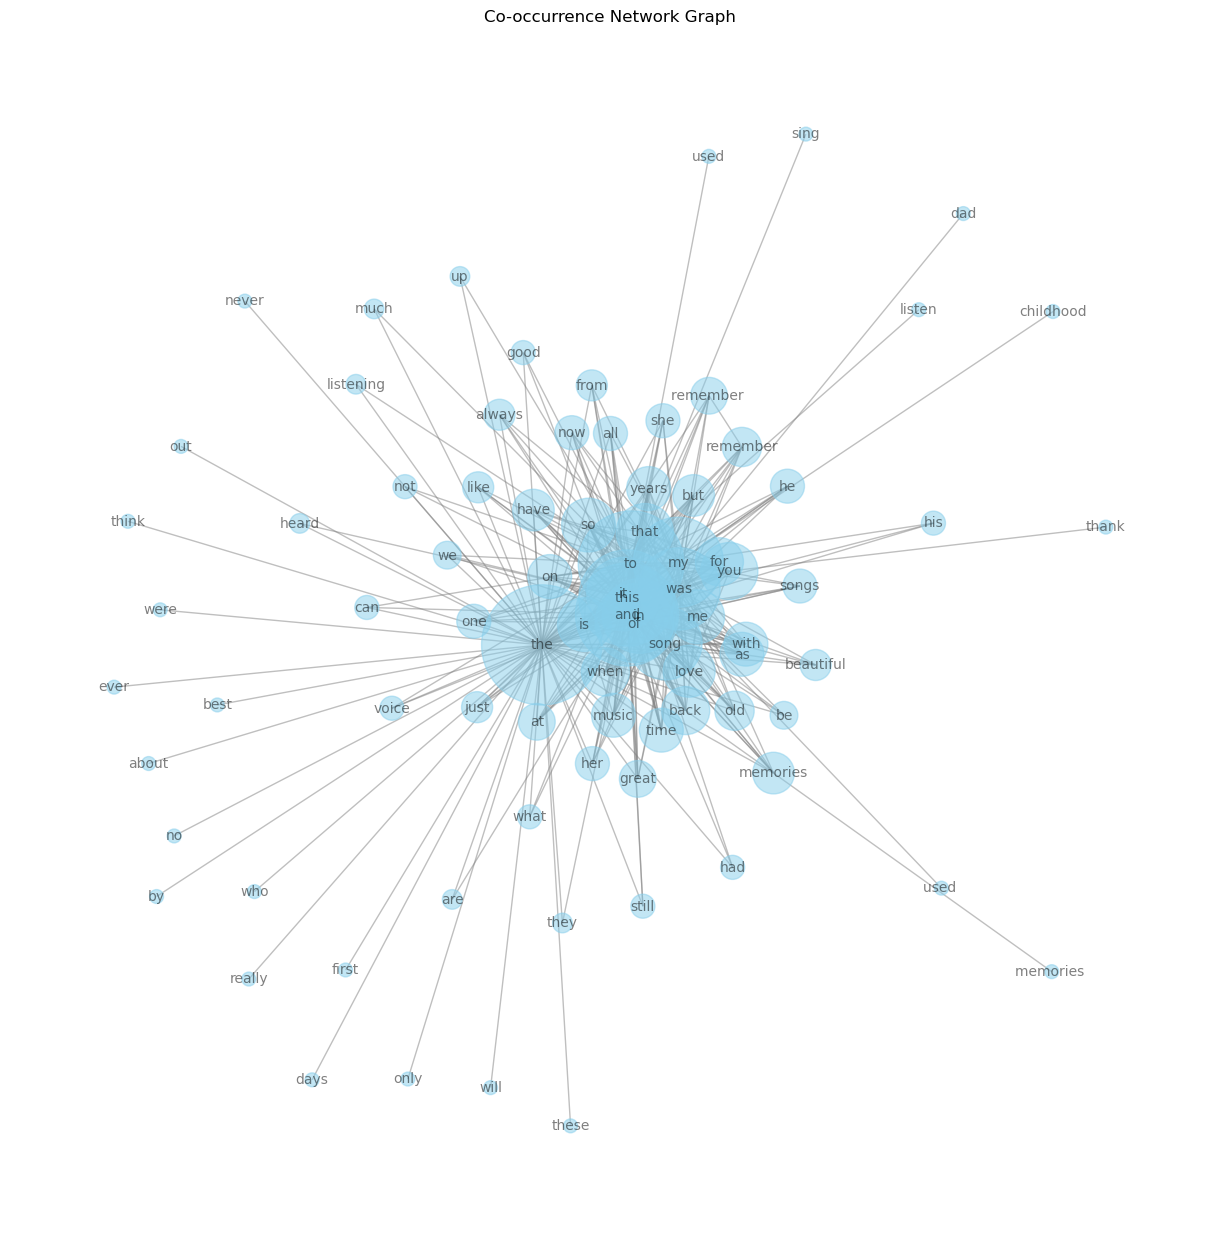

In [356]:
import networkx as nx
import matplotlib.pyplot as plt

# 假設 words 是 augmented_df_top_800.columns
words = augmented_df_max3.columns

# 設定閾值，只顯示共現次數大於某值的詞彙連線
threshold = 100

# 創建網絡圖
G = nx.Graph()

# 確保 co_occurrence_matrix 是稀疏矩陣時，先轉換為普通數組
co_occurrence_matrix_dense = co_occurrence_matrix.toarray()

# 建立共現關係，僅當共現次數超過閾值時，才在圖中添加邊
for i in range(len(words)):
    for j in range(i+1, len(words)):
        if co_occurrence_matrix_dense[i, j] > threshold:
            G.add_edge(words[i], words[j], weight=co_occurrence_matrix_dense[i, j])

# 繪製共現網絡圖
# 繪製共現網絡圖
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)  # k 設置節點間距
node_sizes = [100 * G.degree(word) for word in G.nodes()]  # 基於度數調整節點大小
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=10, edge_color="gray", alpha=0.5)
plt.title('Co-occurrence Network Graph')
plt.show()


In [193]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [194]:
X_pca_tdm.shape

(1499, 2)

In [195]:
X_tsne_tdm.shape

(1499, 2)

In [196]:
X_umap_tdm.shape

(1499, 2)

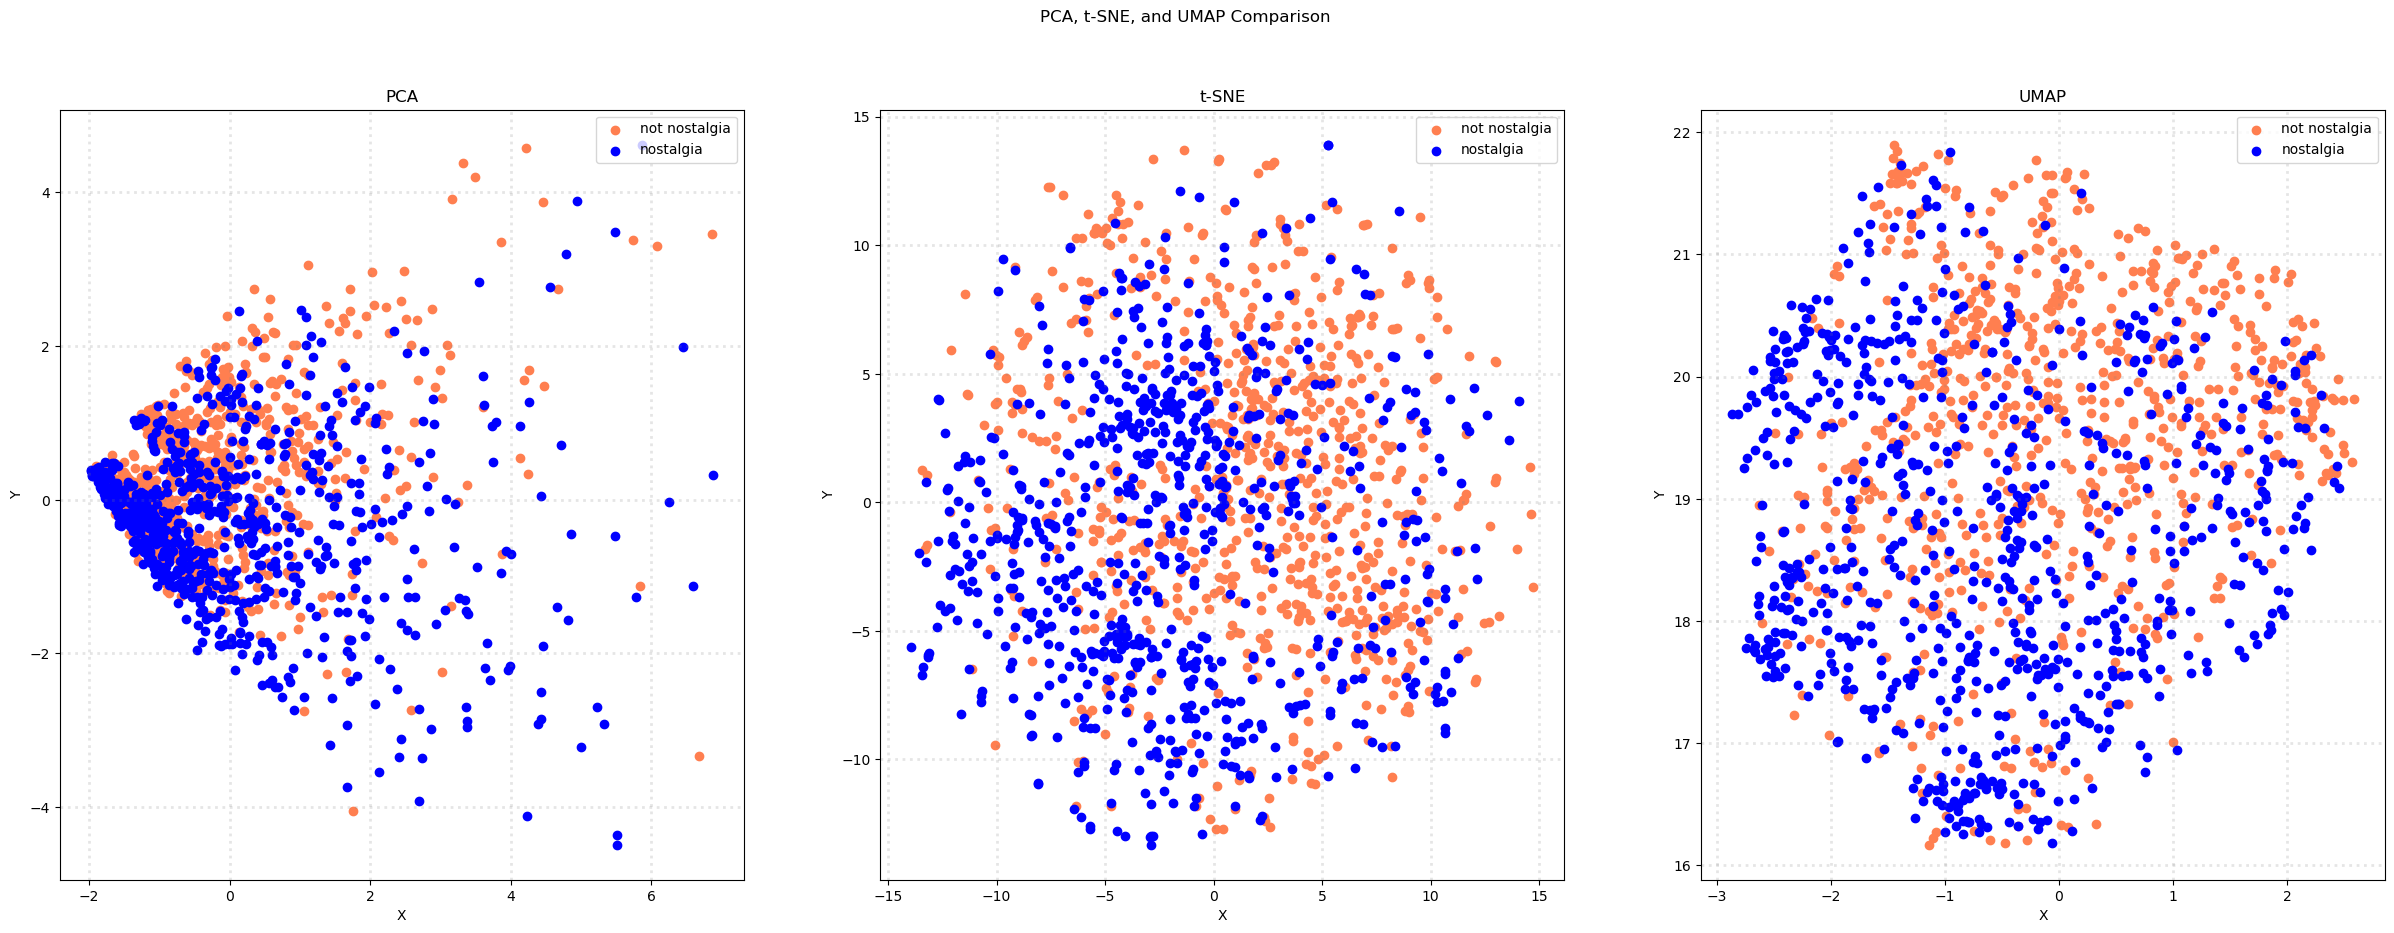

In [197]:
# Plot the results in subplots
col = ['coral', 'blue']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [198]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

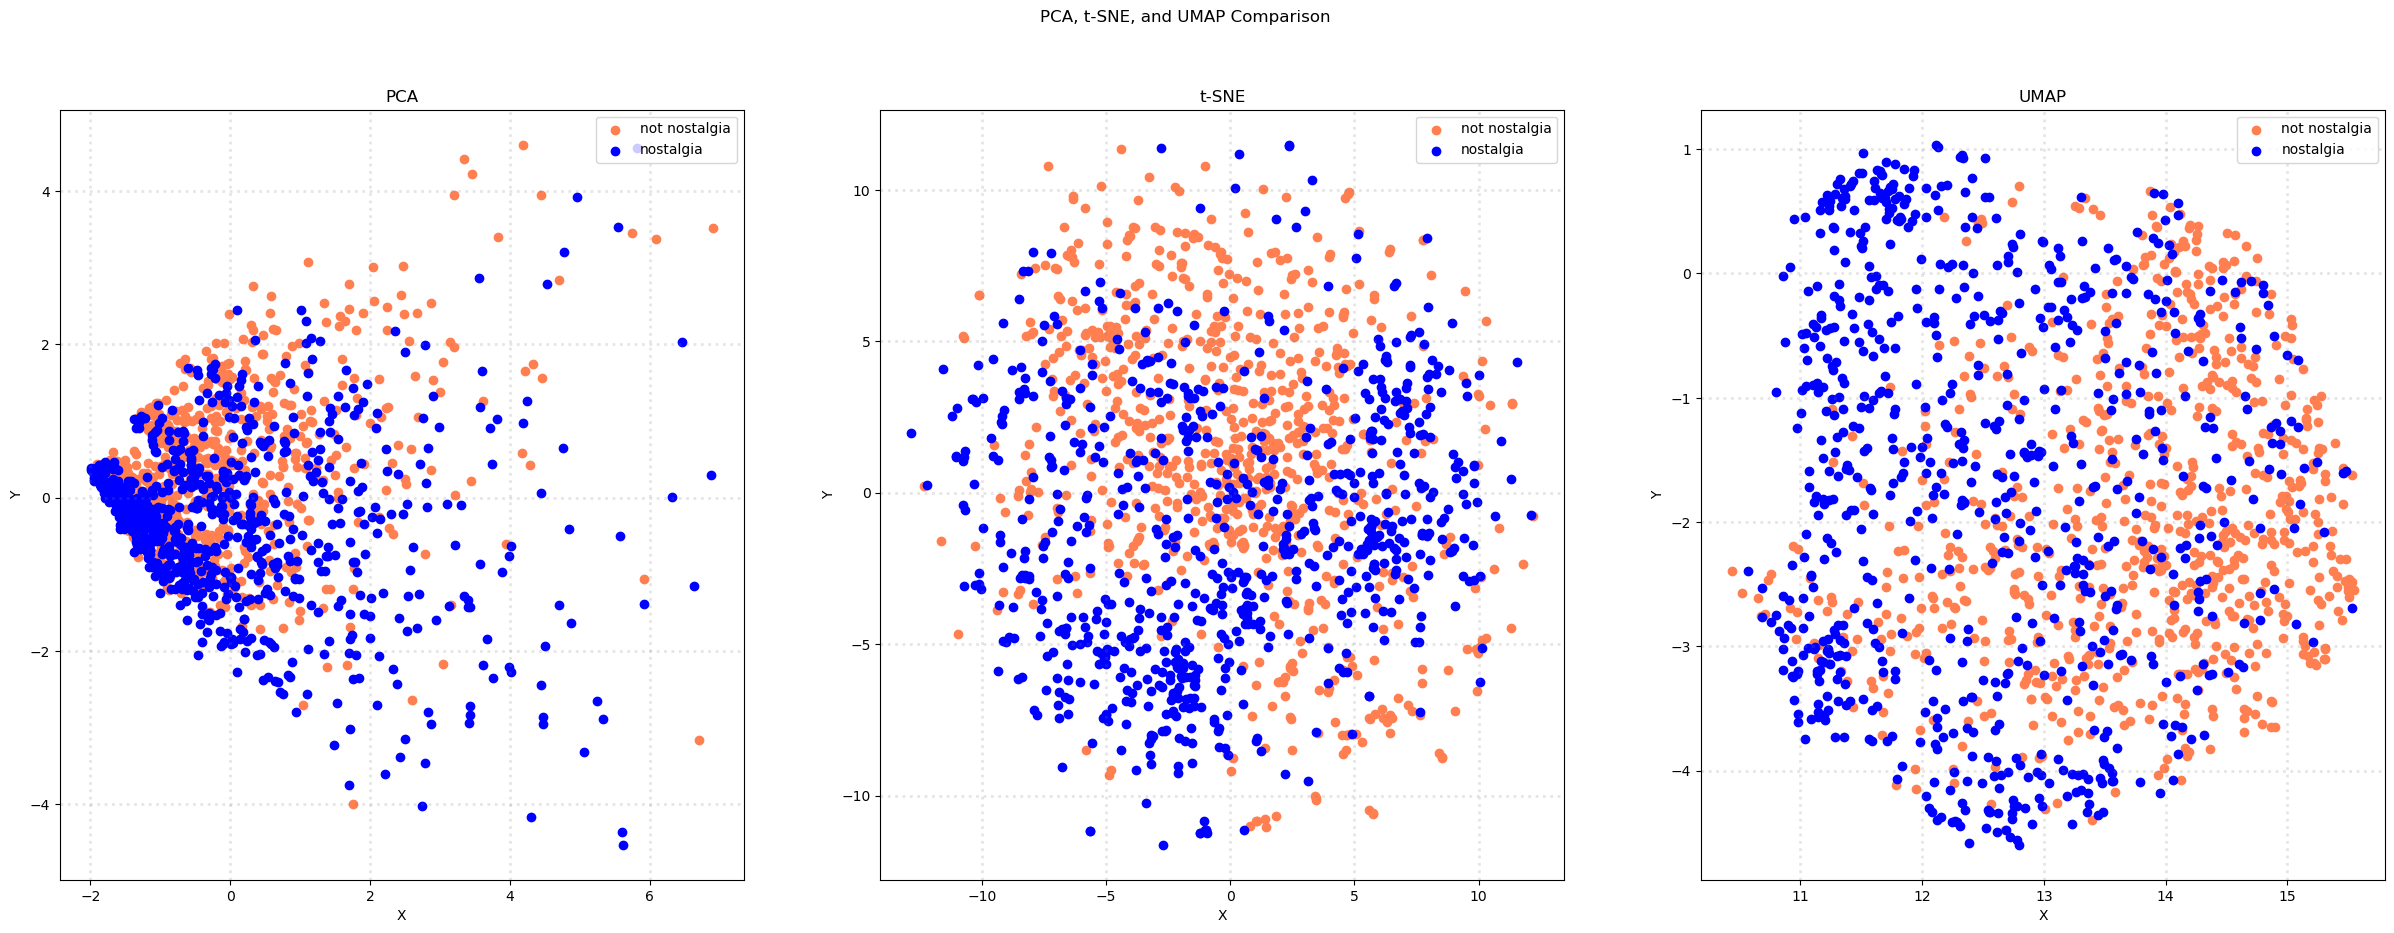

In [199]:
col = ['coral', 'blue']

plt.close()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

三維圖片

In [315]:
# Answer hereimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import pandas as pd

# 用三種模型進行降維
X_pca_aug_3D = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3D = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3D = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

X_pca_aug_3D_top_800 = PCA(n_components=3).fit_transform(augmented_df_top_800.values)
X_tsne_aug_3D_top_800 = TSNE(n_components=3).fit_transform(augmented_df_top_800.values)
X_umap_aug_3D_top_800 = umap.UMAP(n_components=3).fit_transform(augmented_df_top_800.values)

X_pca_aug_3D_max3 = PCA(n_components=3).fit_transform(augmented_df_max3.values)
X_tsne_aug_3D_max3 = TSNE(n_components=3).fit_transform(augmented_df_max3.values)
X_umap_aug_3D_max3 = umap.UMAP(n_components=3).fit_transform(augmented_df_max3.values)

In [309]:
# 建立基礎資訊
col = ['coral', 'blue']
angle_3D = [[0, 15, 90], [0, 60, 120]]

# Define a function to create 3D scatter plot
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category][:, 0]
        ys = X_reduced[X['sentiment_name'] == category][:, 1]
        zs = X_reduced[X['sentiment_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.set_title(title)

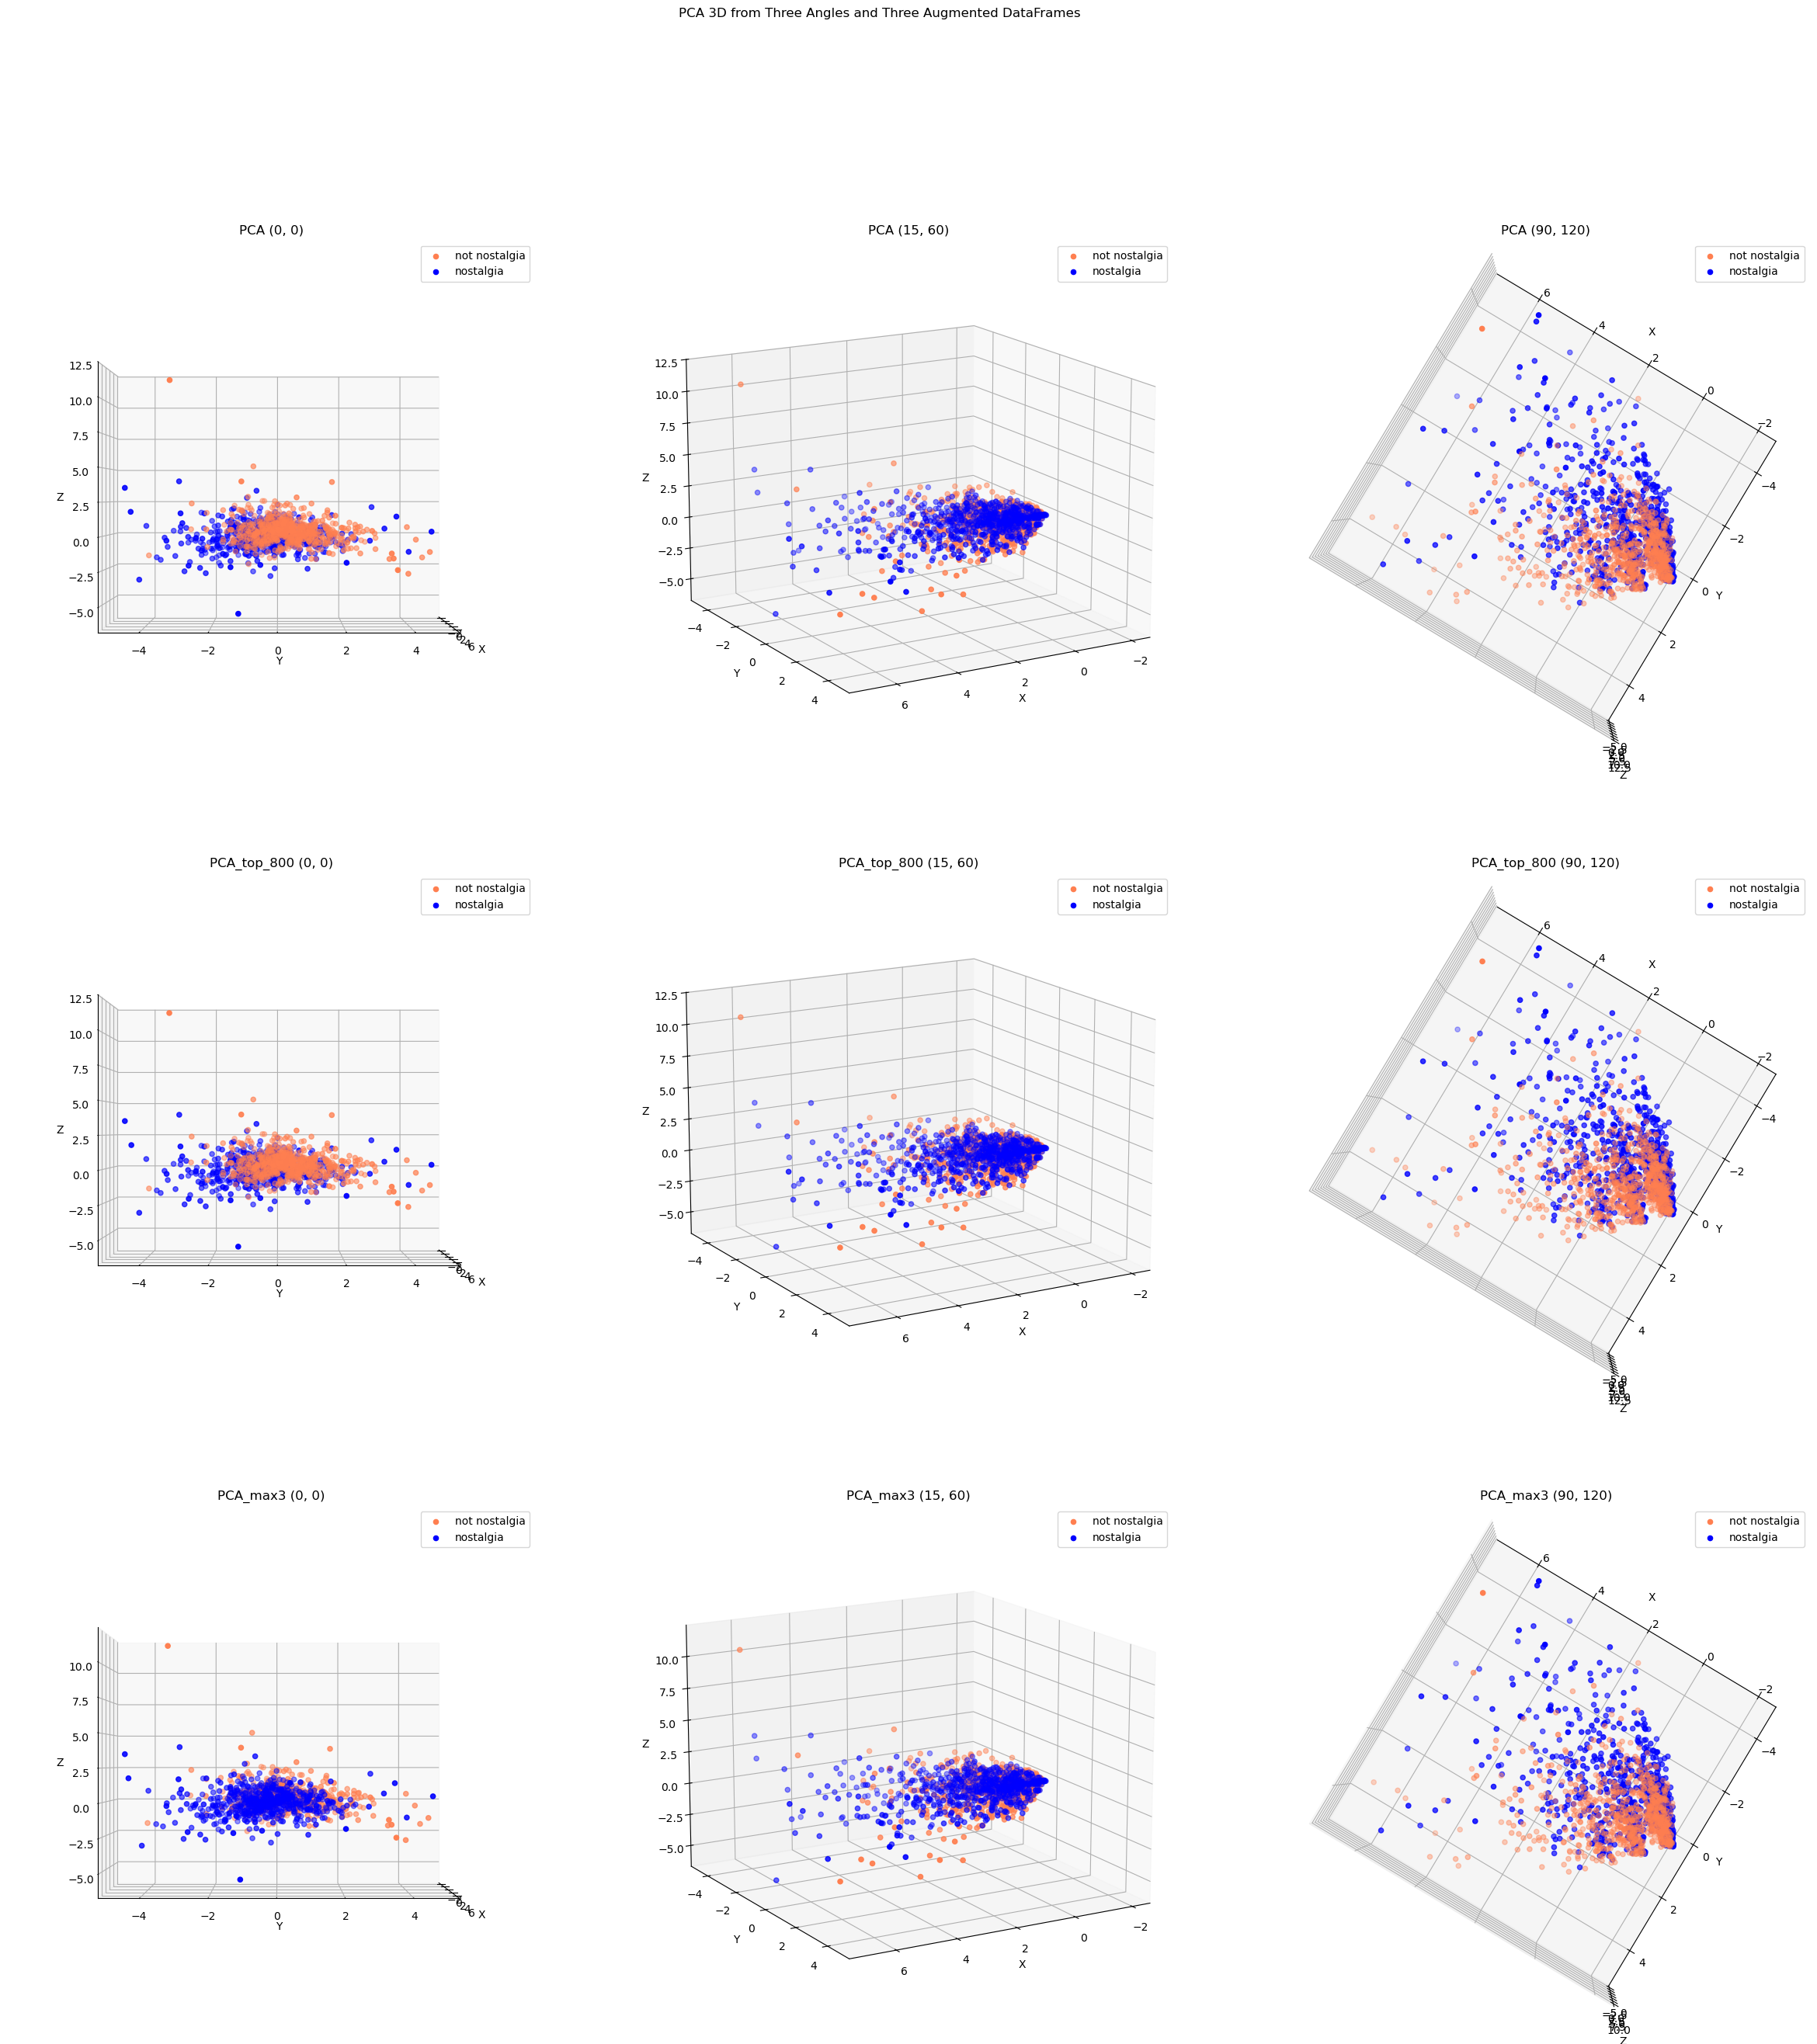

In [323]:
# 建立模型三維圖片(PCA)
plt.close()
fig = plt.figure(figsize=(30, 30))  # 創建一個大圖形以容納九個子圖
fig.suptitle('PCA 3D from Three Angles and Three Augmented DataFrames')

# 第一組子圖 (X_pca_aug_3D)
for i in range(3):
    ax = fig.add_subplot(3, 3, 1 + i, projection='3d')  # 3行3列
    plot_scatter_3d(ax, X_pca_aug_3D, f'PCA ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第二組子圖 (X_pca_aug_3D_top_800)
for i in range(3):
    ax = fig.add_subplot(3, 3, 4 + i, projection='3d')  # 3行3列，接下來的3個子圖
    plot_scatter_3d(ax, X_pca_aug_3D_top_800, f'PCA_top_800 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第三組子圖 (X_pca_aug_3D_max3)
for i in range(3):
    ax = fig.add_subplot(3, 3, 7 + i, projection='3d')  # 3行3列，最後的3個子圖
    plot_scatter_3d(ax, X_pca_aug_3D_max3, f'PCA_max3 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# # Subplot 2: PCA 3D view 
# ax2 = fig.add_subplot(132, projection='3d')
# plot_scatter_3d(ax2, X_pca_aug_3D, f'PCA ({angle_3D[0][1]}, {angle_3D[1][1]})')
# ax2.view_init(angle_3D[0][1], angle_3D[1][1])  # Another angle

# # Subplot 3: PCA 3D view 
# ax3 = fig.add_subplot(133, projection='3d')
# plot_scatter_3d(ax3, X_pca_aug_3D, f'PCA ({angle_3D[0][2]}, {angle_3D[1][2]})')
# ax3.view_init(angle_3D[0][2],angle_3D[1][2])# Another angle

plt.show()

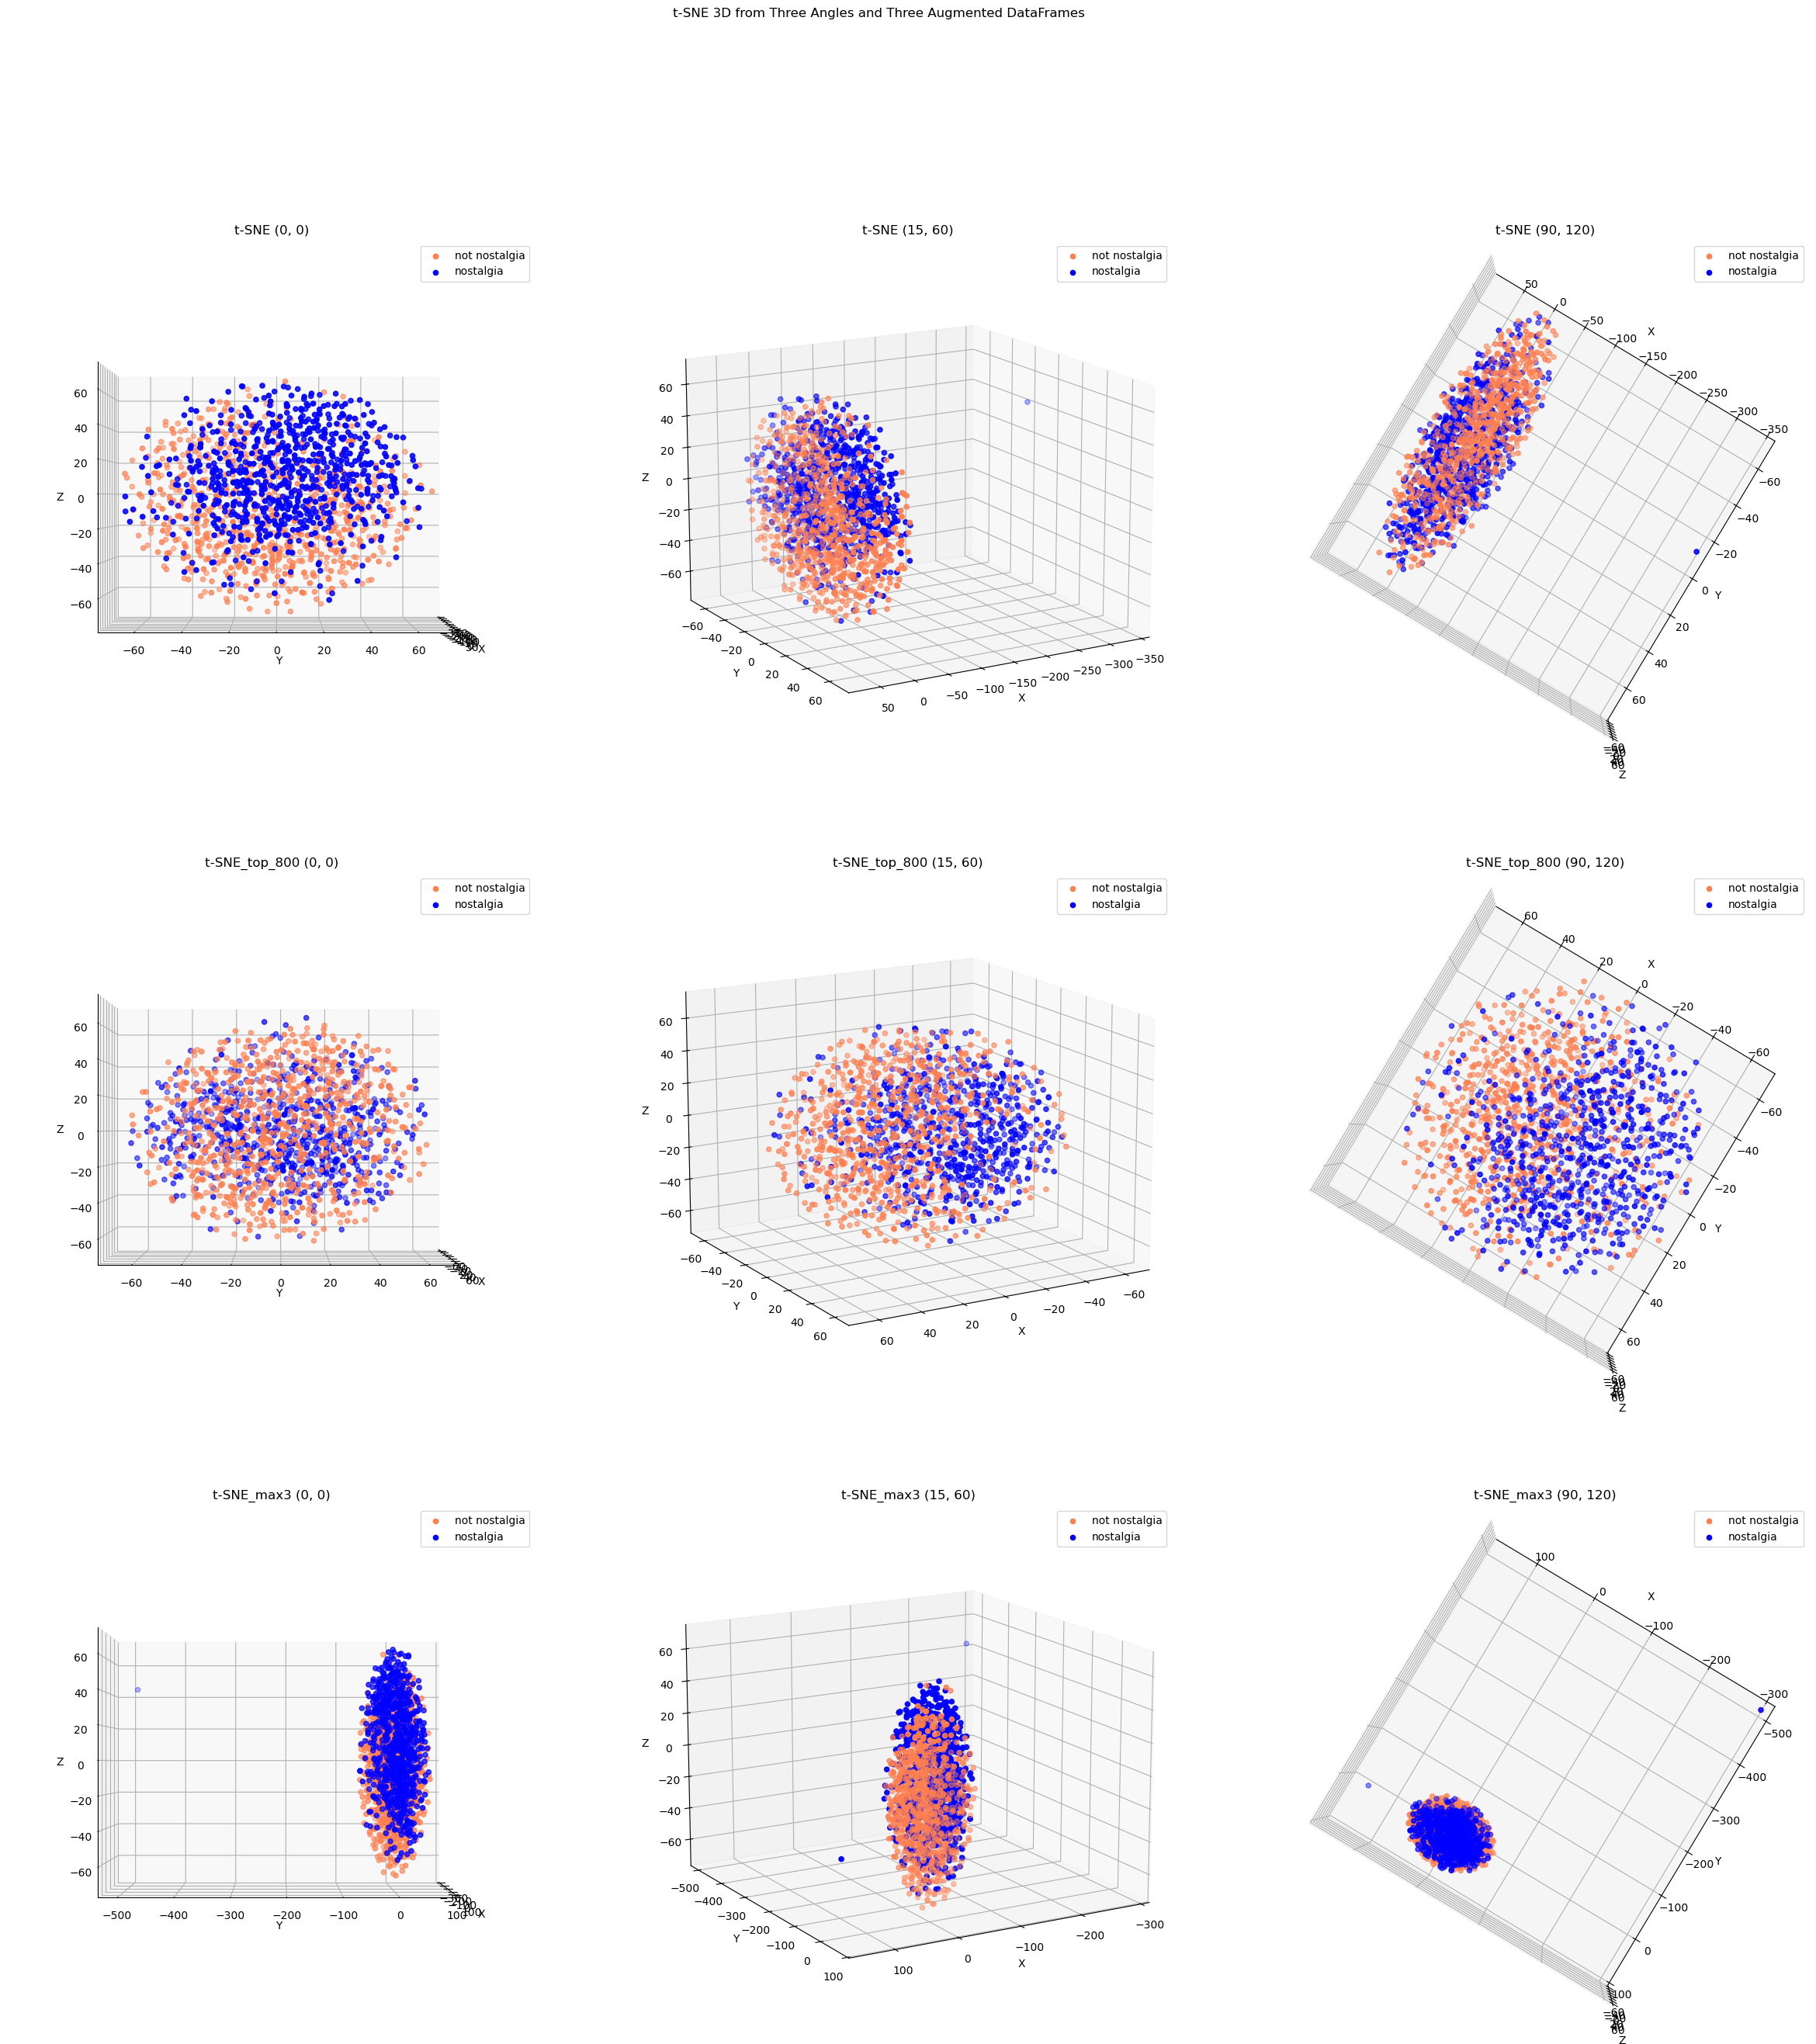

In [326]:
# # 建立模型三維圖片(t-SNE)
# fig_2 = plt.figure(figsize=(30, 10))  # Create a figure with 3 subplots
# fig_2.suptitle('t-SNE 3D from Three Angles')

# # Subplot 1: t-SNE 3D view 
# ax1 = fig_2.add_subplot(131, projection='3d')
# plot_scatter_3d(ax1, X_tsne_aug_3D, f't-SNE ({angle_3D[0][0]}, {angle_3D[1][0]})')
# ax1.view_init(angle_3D[0][0], angle_3D[1][0])  # View from a specific angle

# # Subplot 2: t-SNE 3D view 
# ax2 = fig_2.add_subplot(132, projection='3d')
# plot_scatter_3d(ax2, X_tsne_aug_3D, f't-SNE ({angle_3D[0][1]}, {angle_3D[1][1]})')
# ax2.view_init(angle_3D[0][1], angle_3D[1][1])  # Another angle

# # Subplot 3: t-SNE 3D view 
# ax3 = fig_2.add_subplot(133, projection='3d')
# plot_scatter_3d(ax3, X_tsne_aug_3D, f't-SNE ({angle_3D[0][2]}, {angle_3D[1][2]})')
# ax3.view_init(angle_3D[0][2],angle_3D[1][2])# Another angle


# 建立模型三維圖片(t-SNE)
plt.close()
fig = plt.figure(figsize=(30, 30))  # 創建一個大圖形以容納九個子圖
fig.suptitle('t-SNE 3D from Three Angles and Three Augmented DataFrames')

# 第一組子圖 (X_tsne_aug_3D)
for i in range(3):
    ax = fig.add_subplot(3, 3, 1 + i, projection='3d')  # 3行3列
    plot_scatter_3d(ax, X_tsne_aug_3D, f't-SNE ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第二組子圖 (X_tsne_aug_3D_top_800)
for i in range(3):
    ax = fig.add_subplot(3, 3, 4 + i, projection='3d')  # 3行3列，接下來的3個子圖
    plot_scatter_3d(ax, X_tsne_aug_3D_top_800, f't-SNE_top_800 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第三組子圖 (X_tsne_aug_3D_max3)
for i in range(3):
    ax = fig.add_subplot(3, 3, 7 + i, projection='3d')  # 3行3列，最後的3個子圖
    plot_scatter_3d(ax, X_tsne_aug_3D_max3, f't-SNE_max3 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角
    
plt.show()

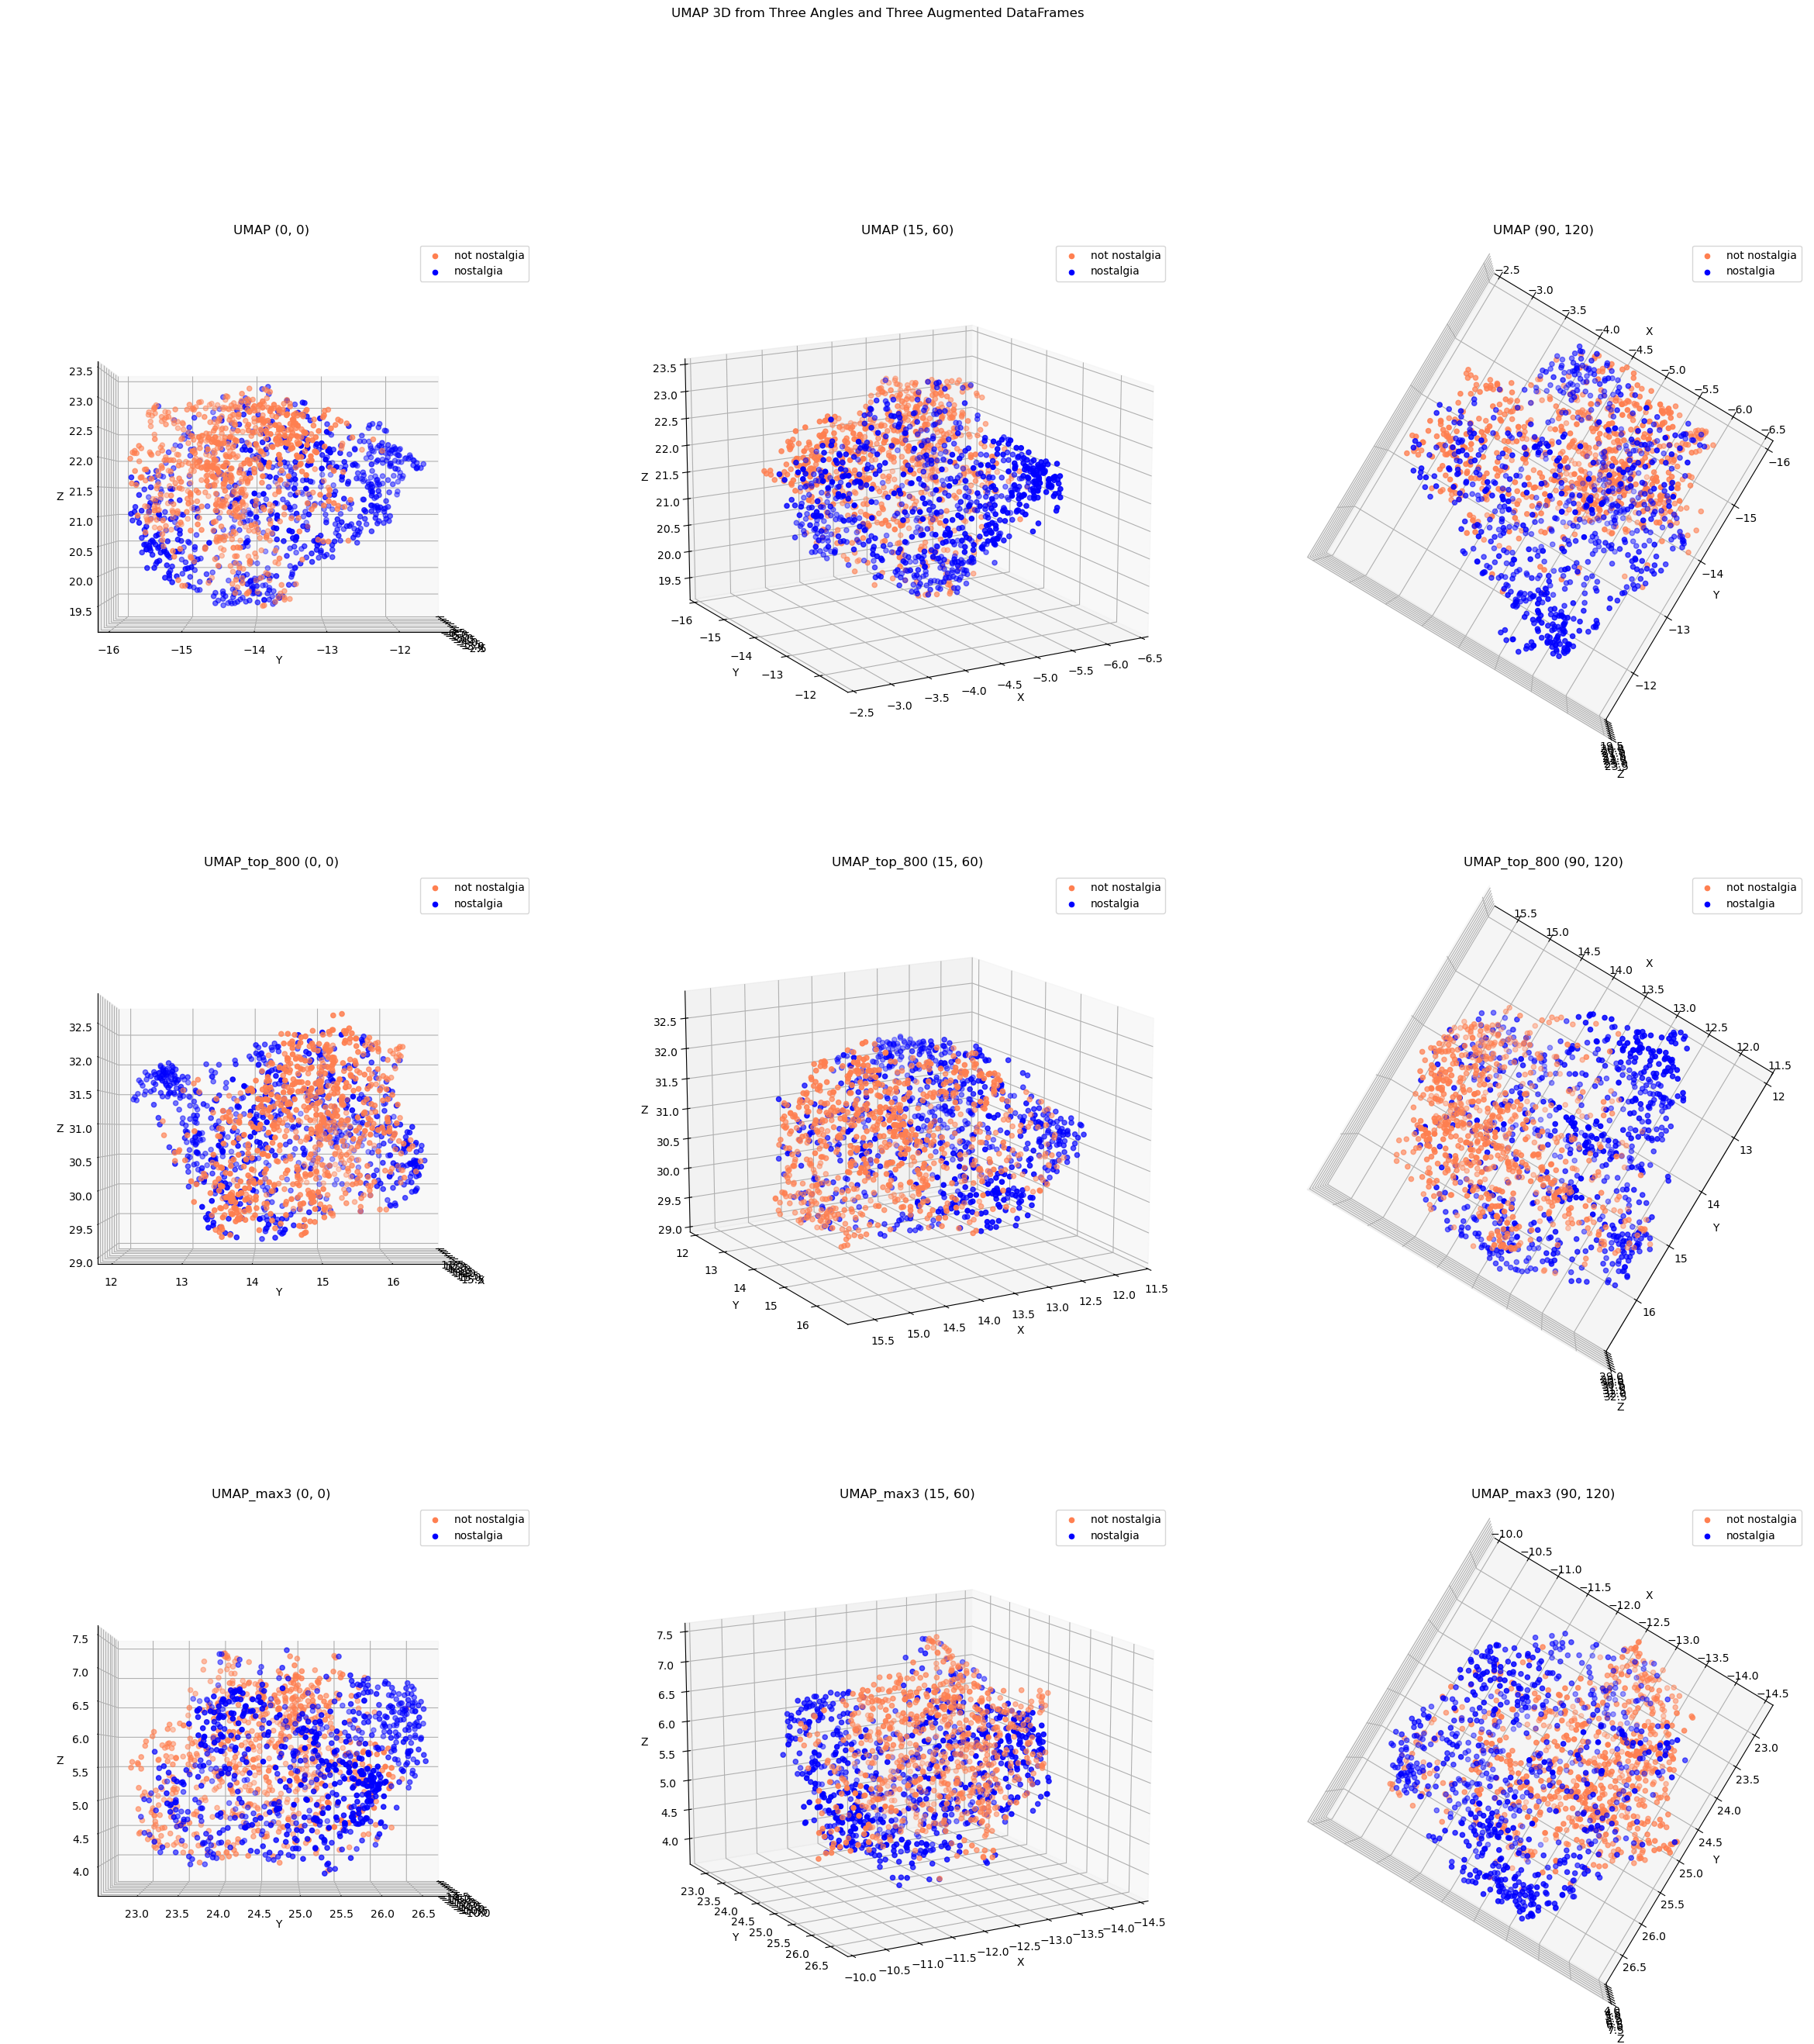

In [327]:
# # 建立模型三維圖片(UMAP)
# fig_3 = plt.figure(figsize=(30, 10))  # Create a figure with 3 subplots
# fig_3.suptitle('UMAP 3D from Three Angles')

# # Subplot 1: UMAP 3D view 
# ax1 = fig_3.add_subplot(131, projection='3d')
# plot_scatter_3d(ax1, X_umap_aug_3D, f'UMAP ({angle_3D[0][0]}, {angle_3D[1][0]})')
# ax1.view_init(angle_3D[0][0], angle_3D[1][0])  # View from a specific angle

# # Subplot 2: UMAP 3D view 
# ax2 = fig_3.add_subplot(132, projection='3d')
# plot_scatter_3d(ax2, X_umap_aug_3D, f'UMAP ({angle_3D[0][1]}, {angle_3D[1][1]})')
# ax2.view_init(angle_3D[0][1], angle_3D[1][1])  # Another angle

# # Subplot 3: UMAP 3D view 
# ax3 = fig_3.add_subplot(133, projection='3d')
# plot_scatter_3d(ax3, X_umap_aug_3D, f'UMAP ({angle_3D[0][2]}, {angle_3D[1][2]})')
# ax3.view_init(angle_3D[0][2],angle_3D[1][2])# Another angle

# 建立模型三維圖片(UMAP)
plt.close()
fig = plt.figure(figsize=(30, 30))  # 創建一個大圖形以容納九個子圖
fig.suptitle('UMAP 3D from Three Angles and Three Augmented DataFrames')

# 第一組子圖 (X_umap_aug_3D)
for i in range(3):
    ax = fig.add_subplot(3, 3, 1 + i, projection='3d')  # 3行3列
    plot_scatter_3d(ax, X_umap_aug_3D, f'UMAP ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第二組子圖 (X_UMAP_aug_3D_top_800)
for i in range(3):
    ax = fig.add_subplot(3, 3, 4 + i, projection='3d')  # 3行3列，接下來的3個子圖
    plot_scatter_3d(ax, X_umap_aug_3D_top_800, f'UMAP_top_800 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角

# 第三組子圖 (X_umap_aug_3D_max3)
for i in range(3):
    ax = fig.add_subplot(3, 3, 7 + i, projection='3d')  # 3行3列，最後的3個子圖
    plot_scatter_3d(ax, X_umap_aug_3D_max3, f'UMAP_max3 ({angle_3D[0][i]}, {angle_3D[1][i]})')
    ax.view_init(angle_3D[0][i], angle_3D[1][i])  # 設定視角
plt.show()

在第一行的圖表表明的是FPGrowth與Supmin=3的情況，在PCA看不太出來他們的分類，而在t-SNE與UMAP的圖形可以比較看的出來，藍色分布一邊，橘色分布一邊

在第二行的圖表表明的是FEA top 800的情況，在t-SNE是所有裡面分布最有差異的，其他都與第一行的情形差不多

在第三行的圖表表明的是MaxFPGrowth與Supmin=3的情況，在PCA依舊看不太出來他們的分類與前兩種方法差不多，而在t-SNE則是更加密集完全看不出，而在UMAP的圖形則是醉在第三個角度可以明顯發現兩個顏色各靠一邊

### 3.6 Discretization and Binarization

In [207]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [208]:
mlb = preprocessing.LabelBinarizer()

In [210]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [211]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [212]:
X[0:9]

sentiment                                            comment  \
0          1  He was a singer with a golden voice that I lov...   
1          0  The mist beautiful voice ever I listened to hi...   
2          0  I have most of Mr. Reeves songs.  Always love ...   
3          1  30 day leave from 1st tour in Viet Nam to conv...   
4          0  listening to his songs reminds me of my mum wh...   
5          0  Every time I heard this song as a child, I use...   
6          0  My dad loved listening to Jim Reeves, when I w...   
7          0  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8          1           Wherever you  are you always in my heart   

  sentiment_name                                           unigrams  \
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...   
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...   
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4      nostalgia  [listening, to, his, songs, reminds, me, of, m...   
5      nostalgia  [Every, time, I, heard, this, song, as, a, chi...   
6      nostalgia  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7      nostalgia  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8  not nostalgia   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_sentiment  
0  {He, all, vouch, loving., singer, Jim, great, ...           [1]  
1  {an, singing, kid, him, I, to, ever, of, Never...           [0]  
2  {town, around., how, They, who, --, people, gr...           [0]  
3  {all, served, day, me", 30, This, who, "marry,...           [1]  
4  {played, of, everyday, him, reminds, me, who, ...           [0]  
5  {touches, funerals., fear, got, song., Jim, yo...           [0]  
6  {how, Jim, in, the, listening, for, do, Time, ...           [0]  
7  {i, since, ALSO, Jim, in, the, tunes, he, feel...           [0]  
8        {always, Wherever, are, you, in, my, heart}           [1]

## 4. Data Exploration

In [215]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [216]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [217]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [218]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print the cosine similarity values
print("Cosine Similarity using count between 1 and 2: %.4f" % cos_sim_count_1_2[0][0])
print("Cosine Similarity using count between 1 and 3: %.4f" % cos_sim_count_1_3[0][0])
print("Cosine Similarity using count between 2 and 3: %.4f" % cos_sim_count_2_3[0][0])

print("Cosine Similarity using count between 1 and 1: %.4f" % cos_sim_count_1_1[0][0])
print("Cosine Similarity using count between 2 and 2: %.4f" % cos_sim_count_2_2[0][0])
print("Cosine Similarity using count between 3 and 3: %.4f" % cos_sim_count_3_3[0][0])

Cosine Similarity using count between 1 and 2: 0.0322
Cosine Similarity using count between 1 and 3: 0.0279
Cosine Similarity using count between 2 and 3: 0.0000
Cosine Similarity using count between 1 and 1: 1.0000
Cosine Similarity using count between 2 and 2: 1.0000
Cosine Similarity using count between 3 and 3: 1.0000


## 5. Data Classification

In [287]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)
print(category_mapping)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=2)

{1: 'not nostalgia', 0: 'nostalgia'}
['nostalgia', 'not nostalgia']


In [288]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1392   0    0    0   0   0    0    0   0     0   0  ...      0         0   
399    0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
279    0    0    0   0   0    0    0   0     0   0  ...      0         0   
301    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
466    0    0    0   0   0    0    0   0     0   0  ...      0         0   
299    0    0    0   0   0    0    0   0     0   0  ...      0         0   
493    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1192   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1392      0         0        0    0    0    0        0      0  
399       0         0        0    1    0    0        0      0  
991       0         0        0    0    0    0        0      0  
279       0         0        0    0    0    0        0      0  
301       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
466       0         0        0    0    0    0        0      0  
299       0         0        0    0    0    0        0      0  
493       0         0        0    0    0    0        0      0  
527       0         0        0    0    0    0        0      0  
1192      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [289]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1321   0    0    0   0   0    0    0   0     0   0  ...      0         0   
903    0    0    0   0   0    0    0   0     0   1  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
69     0    0    0   0   0    0    0   0     0   0  ...      0         0   
272    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
708    0    0    0   0   0    0    0   0     0   0  ...      0         0   
60     0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   
265    0    0    0   0   0    0    0   0     0   0  ...      0         0   
472    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1321      0         0        0    0    0    0        0      0  
903       0         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
69        0         0        0    0    0    0        0      0  
272       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
708       0         0        0    0    0    0        0      0  
60        0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  
265       0         0        0    0    0    0        0      0  
472       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [290]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8711111111111111

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8293    0.9273    0.8755       220
not nostalgia     0.9216    0.8174    0.8664       230

     accuracy                         0.8711       450
    macro avg     0.8754    0.8723    0.8709       450
 weighted avg     0.8764    0.8711    0.8708       450



In [291]:
# 使用增強的特徵資料集
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=2)

In [292]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  store  watched  fun  \
1392   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
399    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
991    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
279    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
301    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...      ...  ...   
466    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
299    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
493    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
527    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
1192   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   

      1950s  bar  57  whatever  august  roller  will favorite  
1392      0    0   0         0       0       0              0  
399       0    0   0         0       0       0              0  
991       0    0   0         0       0       0              0  
279       0    0   0         0       0       0              0  
301       0    0   0         0       0       0              0  
...     ...  ...  ..       ...     ...     ...            ...  
466       0    0   0         0       0       0              0  
299       0    0   0         0       0       0              0  
493       0    0   0         0       0       0              0  
527       0    0   0         0       0       0              0  
1192      0    0   0         0       0       0              0  

[1049 rows x 4784 columns]

In [293]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  store  watched  fun  \
1321   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
903    0    0    0   0   0    0    0   0     0   1  ...      0        0    0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
69     0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
272    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...      ...  ...   
708    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
60     0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
201    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
265    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   
472    0    0    0   0   0    0    0   0     0   0  ...      0        0    0   

      1950s  bar  57  whatever  august  roller  will favorite  
1321      0    0   0         0       0       0              0  
903       0    0   0         0       0       0              0  
1275      0    0   0         0       0       0              0  
69        0    0   0         0       0       0              0  
272       0    0   0         0       0       0              0  
...     ...  ...  ..       ...     ...     ...            ...  
708       0    0   0         0       0       0              0  
60        0    0   0         0       0       0              0  
201       0    0   0         0       0       0              0  
265       0    0   0         0       0       0              0  
472       0    0   0         0       0       0              0  

[450 rows x 4784 columns]

In [294]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8866666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8477    0.9364    0.8898       220
not nostalgia     0.9324    0.8391    0.8833       230

     accuracy                         0.8867       450
    macro avg     0.8901    0.8877    0.8866       450
 weighted avg     0.8910    0.8867    0.8865       450



In [330]:
# 使用增強的特徵資料集 by top 800
X_train, X_test, y_train, y_test = train_test_split(augmented_df_top_800, X['sentiment'], test_size=0.3, random_state=2)

In [331]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8340    0.9364    0.8822       220
not nostalgia     0.9310    0.8217    0.8730       230

     accuracy                         0.8778       450
    macro avg     0.8825    0.8791    0.8776       450
 weighted avg     0.8836    0.8778    0.8775       450



In [328]:
# 使用增強的特徵資料集 by max 3
X_train, X_test, y_train, y_test = train_test_split(augmented_df_max3, X['sentiment'], test_size=0.3, random_state=2)

In [329]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8340    0.9364    0.8822       220
not nostalgia     0.9310    0.8217    0.8730       230

     accuracy                         0.8778       450
    macro avg     0.8825    0.8791    0.8776       450
 weighted avg     0.8836    0.8778    0.8775       450



C:\Users\USER\anaconda3\envs\fangfang\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.



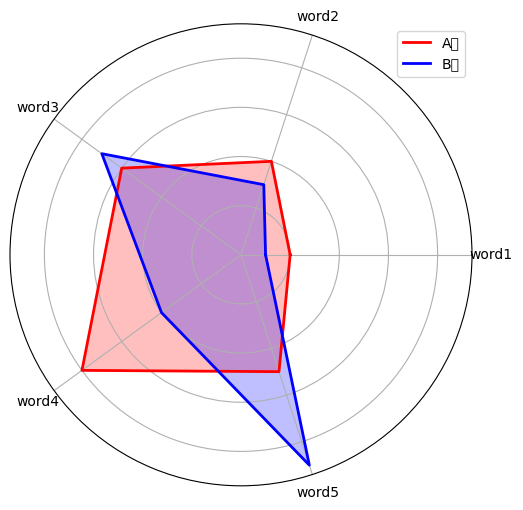

In [332]:
import matplotlib.pyplot as plt
import numpy as np

# 假設已經有A類和B類評論的詞頻結果
labels = ['word1', 'word2', 'word3', 'word4', 'word5']
A_freq = [0.2, 0.4, 0.6, 0.8, 0.5]
B_freq = [0.1, 0.3, 0.7, 0.4, 0.9]

# 創建角度數據
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# A類評論的數據
A_freq += A_freq[:1]
B_freq += B_freq[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 畫A類的雷達圖
ax.fill(angles, A_freq, color='red', alpha=0.25)
ax.plot(angles, A_freq, color='red', linewidth=2, label='A類')

# 畫B類的雷達圖
ax.fill(angles, B_freq, color='blue', alpha=0.25)
ax.plot(angles, B_freq, color='blue', linewidth=2, label='B類')

# 設置標籤
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.legend(loc='upper right')
plt.show()
